# 🦉 **BBO Project — Complete Restart (Step-by-Step Pipeline)**
### **Saw-whet Owl Detection Analysis & Movement Modeling**  
**Author:** *Lakshita Markanday*  
**Dataset Version:** June 2024  

---

## 📘 **Project Overview**
This notebook rebuilds the entire BBO (Beaverhill Bird Observatory) project from scratch using all provided datasets.  
It combines machine learning tasks, exploratory detection analysis, and **client-requested direction interpretation**.

---

# 🟧 **Core ML Problem Statements (From Project Presentation)**

### **1️⃣ Migration Activity Prediction — Classification**  
Predict whether an owl will show migration activity on a given night using biological and temporal features.

### **2️⃣ Detection Duration Modeling — Regression**  
Estimate how long an owl remains detectable after tagging using biological and environmental features.

### **3️⃣ Yearly Migration Comparison — Comparative Analysis**  
Compare owl activity and biological patterns across **2023 vs 2024** to identify seasonal and annual differences.

### **4️⃣ Nanotag Performance Assessment — Regression / Time-Series**  
Determine whether changes in detections are due to **tag degradation** or **biological behaviour**.

---

# 🟦 **Client-Specific Requirements (Must Be Delivered)**

### **1️⃣ Focus heavily on detection-based insights**  
The client prioritizes:  
- detection timelines  
- daily/hourly activity patterns  
- station/port behaviour  
- multi-day detection windows  
- dropping or rising detection trends

### **2️⃣ Use antenna direction to estimate owl movement**  
Each port corresponds to a specific azimuth direction.  
By tracking **port → azimuth changes over time**, we infer where the owl moved.  
This produces a **flight direction sequence** for each owl.

### **3️⃣ Prioritize multi-day tags**  
The client explicitly suggested focusing on:  
- **Tag 80830 → 31 days**  
- **Tag 80821 → 10 days**  
- **Tag 80805 → 13 days**  
These tags will be highlighted in timelines, movement plots, and duration models.

### **4️⃣ Produce clear visualizations for client use**  
Deliver:  
- movement direction graphs  
- detection timeline charts  
- port-direction heatmaps  
- detection trend curves  
- signal/port reliability visuals  

These plots must be easy for the client to interpret and use in his research.

---

## 🛠️ **Notebook Workflow (Step-by-Step Plan)**

### **Step 1 — Load detection sheet names**  
### **Step 2 — Load & combine all detection sheets**  
### **Step 3 — Clean detection data**  
### **Step 4 — Load tag deployment data**  
### **Step 5 — Load tag metadata**  
### **Step 6 — Merge into a master dataset**  
### **Step 7 — Add antenna direction data**  
### **Step 8 — Feature engineering**  
### **Step 9 — EDA (Exploratory Data Analysis)**  
### **Step 10 — Modeling (all 4 ML tasks)**  
### **Step 11 — Client-focused movement + detection insights**  

---

## ✔️ Let's Begin!
Proceed to **Step 1: Load detection sheet names** below.


In [2]:
import pandas as pd

file_det = '/Users/lakshita/Desktop/college material/college material/term 4/CMPT-3835 Machine Learning WIL II/Project/Proj information/Birds Observatory/Birds Dataset/SG-7102RPI39090  June 3 2024 Saw-whets data.xlsx'

# Load all sheets
xls = pd.ExcelFile(file_det)
all_sheets = xls.sheet_names

all_dets = []

for sheet in all_sheets:
    
    # Read each sheet
    df = pd.read_excel(file_det, sheet_name=sheet)
    
    # Extract TRUE TagID from motusTagID column
    if "motusTagID" in df.columns:
        df["tagID"] = df["motusTagID"]
    else:
        df["tagID"] = None   # will filter out later
    
    # Save sheet name too (useful)
    df["source_sheet"] = sheet
    
    all_dets.append(df)

# Combine all sheets
detections_raw = pd.concat(all_dets, ignore_index=True)

# Keep only rows with valid TagID
detections_raw = detections_raw[detections_raw["tagID"].notna()]

# Convert to int
detections_raw["tagID"] = detections_raw["tagID"].astype(int)

# Reset index
detections_raw = detections_raw.reset_index(drop=True)

detections_raw["tagID"].value_counts()


tagID
80810    12354
80822     8026
80821     7047
80796     5550
80809     4492
80815     4442
80823     4342
80801     4244
80805     3855
80835     3598
80830     3188
80814     3116
80834     3082
80817     2636
80795     2408
80820     2295
80803     2192
80819     2170
80832     2002
80818     1933
80806     1932
80802     1843
80804     1462
80826     1446
80807     1246
80798     1204
80813     1179
80827     1079
80840      930
80829      870
80833      863
80800      830
80838      766
80812      752
80816      686
80808      659
80824      614
80837      520
80828      471
80831      230
80839      222
80204      114
80207        9
Name: count, dtype: int64

In [3]:
detections_raw.columns


Index(['Unnamed: 0', 'hitID', 'runID', 'batchID', 'ts', 'tsCorrected', 'DATE',
       'TIME', 'sig', 'sigsd', 'noise', 'snr', 'freq', 'freqsd', 'slop',
       'burstSlop', 'done', 'motusTagID', 'ambigID', 'port', 'antBearing',
       'nodeNum', 'runLen', 'motusFilter', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'tagID', 'source_sheet', 'Port #1',
       'Port #2', 'Port #3', 'Port #4', ' '],
      dtype='object')

In [4]:
detections_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102899 entries, 0 to 102898
Data columns (total 47 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    102899 non-null  float64       
 1   hitID         102899 non-null  float64       
 2   runID         102899 non-null  float64       
 3   batchID       102899 non-null  float64       
 4   ts            102899 non-null  float64       
 5   tsCorrected   102899 non-null  float64       
 6   DATE          102899 non-null  datetime64[ns]
 7   TIME          102899 non-null  datetime64[ns]
 8   sig           102899 non-null  float64       
 9   sigsd         102899 non-null  float64       
 10  noise         102899 non-null  float64       
 11  snr           102147 non-null  float64       
 12  freq          102899 non-null  float64       
 13  freqsd        102899 non-null  float64       
 14  slop          102899 non-null  float64       
 15  burstSlop     102

In [5]:
detections_raw.shape

(102899, 47)

In [6]:
detections_raw.head()

,Unnamed: 0,hitID,runID,batchID,ts,tsCorrected,DATE,TIME,sig,sigsd,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,tagID,source_sheet,Port #1,Port #2,Port #3,Port #4,
0,118314.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:29:50.159,2023-10-18 01:29:50.159,-55.4792,52.8298,...,NaN,0 (N),NaN,80840,80840,NaN,NaN,NaN,NaN,NaN
1,118315.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:30:21.854,2023-10-18 01:30:21.854,-51.7197,5.7551,...,4.0,2023-10-18 01:30:21.854000,0.412740,80840,80840,NaN,NaN,NaN,NaN,NaN
2,118319.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:30:53.549,2023-10-18 01:30:53.549,-44.6261,9.2732,...,4.0,2023-10-18 01:31:25.245000,0.330030,80840,80840,NaN,NaN,NaN,NaN,NaN
3,118325.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:31:25.245,2023-10-18 01:31:25.245,-54.1483,35.4253,...,4.0,2023-10-18 01:31:56.940000,0.270506,80840,80840,NaN,NaN,NaN,NaN,NaN
4,118330.0,2.644432e+10,702884163.0,14989130.0,1.697614e+09,1.697614e+09,2023-10-18 01:31:56.940,2023-10-18 01:31:56.940,-44.3938,17.2196,...,4.0,2023-10-18 01:32:28.635000,0.313213,80840,80840,NaN,NaN,NaN,NaN,NaN


In [7]:
# detections_raw["tagID"].value_counts().head(10)

In [8]:
# Remove rows that contain "#DIV/0!"
mask_div = detections_raw.astype(str).apply(lambda x: x.str.contains("#DIV/0!")).any(axis=1)
detections_raw = detections_raw[~mask_div].copy()


In [9]:
# detections_raw.shape

In [10]:
# detections_clean = detections_raw.loc[:, ~detections_raw.columns.str.contains("Unnamed")]
# detections_clean = detections_clean.loc[:, detections_clean.columns.str.strip() != ""]


In [11]:
# detections_clean["datetime"] = pd.to_datetime(
#     detections_clean["DATE"].astype(str) + " " + detections_clean["TIME"].astype(str),
#     errors="coerce"
# )


In [12]:
df = detections_raw.copy()

# Remove footer garbage (#DIV/0!)
mask_div = df.astype(str).apply(lambda x: x.str.contains("#DIV/0!", na=False)).any(axis=1)
df = df[~mask_div].copy()

# Drop all Unnamed columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Drop useless metadata columns
cols_to_drop = ["nodeNum", "ambigID", "Port #1", "Port #2", "Port #3", "Port #4", "done"]
for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=c)

# Create datetime from tsCorrected (UNIX timestamp)
df["datetime"] = pd.to_datetime(df["tsCorrected"], unit="s", errors="coerce")

# Drop invalid datetime
df = df.dropna(subset=["datetime"])

# Convert numeric columns
numeric_cols = ["sig", "sigsd", "noise", "snr", "freq", "freqsd", "slop", "burstSlop", "runLen"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Sort cleanly
df = df.sort_values(by=["tagID", "datetime"]).reset_index(drop=True)

detections_clean = df

detections_clean.info()
detections_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102899 entries, 0 to 102898
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   hitID         102899 non-null  float64       
 1   runID         102899 non-null  float64       
 2   batchID       102899 non-null  float64       
 3   ts            102899 non-null  float64       
 4   tsCorrected   102899 non-null  float64       
 5   DATE          102899 non-null  datetime64[ns]
 6   TIME          102899 non-null  datetime64[ns]
 7   sig           102899 non-null  float64       
 8   sigsd         102899 non-null  float64       
 9   noise         102899 non-null  float64       
 10  snr           102147 non-null  float64       
 11  freq          102899 non-null  float64       
 12  freqsd        102899 non-null  float64       
 13  slop          102899 non-null  float64       
 14  burstSlop     102899 non-null  float64       
 15  motusTagID    102

,hitID,runID,batchID,ts,tsCorrected,DATE,TIME,sig,sigsd,noise,...,burstSlop,motusTagID,port,antBearing,runLen,motusFilter,tagID,source_sheet,,datetime
0,2.472888e+10,655362036.0,13702736.0,1.695465e+09,1.695465e+09,2023-09-23 04:30:16.730,2023-09-23 04:30:16.730,-73.1216,21.7875,-81.3775,...,0.0000,80204.0,2.0,215.0,55.0,1.0,80204,80204,NaN,2023-09-23 10:30:16.730000019
1,2.472888e+10,655362036.0,13702736.0,1.695465e+09,1.695465e+09,2023-09-23 04:31:33.822,2023-09-23 04:31:33.822,-72.3861,13.0140,-80.9954,...,0.0006,80204.0,2.0,215.0,55.0,1.0,80204,80204,NaN,2023-09-23 10:31:33.822299957
2,2.472888e+10,655362036.0,13702736.0,1.695465e+09,1.695465e+09,2023-09-23 04:32:50.915,2023-09-23 04:32:50.915,-71.7542,17.5617,-80.8867,...,0.0007,80204.0,2.0,215.0,55.0,1.0,80204,80204,NaN,2023-09-23 10:32:50.914700031
3,2.472888e+10,655362036.0,13702736.0,1.695465e+09,1.695465e+09,2023-09-23 04:33:16.612,2023-09-23 04:33:16.612,-72.6930,11.6667,-80.9816,...,0.0000,80204.0,2.0,215.0,55.0,1.0,80204,80204,NaN,2023-09-23 10:33:16.611999989
4,2.472888e+10,655362036.0,13702736.0,1.695465e+09,1.695465e+09,2023-09-23 04:33:42.309,2023-09-23 04:33:42.309,-71.9546,16.4825,-81.0976,...,0.0000,80204.0,2.0,215.0,55.0,1.0,80204,80204,NaN,2023-09-23 10:33:42.309400082


In [13]:
detections_clean.shape


(102899, 24)

In [14]:
import pandas as pd

file_dep = '/Users/lakshita/Desktop/college material/college material/term 4/CMPT-3835 Machine Learning WIL II/Project/Proj information/Birds Observatory/Birds Dataset/tag-deployments.csv'
deploy = pd.read_csv(file_dep)

deploy.head()


,tagID,tagProjectID,mfgID,dateBin,type,codeset,manufacturer,model,lifespan,nomFreq,...,age,weight,wing,tarsus,culmen,bill,head,fatScore,comments,attachment
0,80795,664,78,2023-3,32-bit,Lotek6M,Lotek,NTQB2-4-2-M,1111,166.38,...,ad,86.0,138.0,NaN,NaN,NaN,NaN,NaN,Backpack with Spectra tape \r\nName: Glimmer,Other
1,80796,664,79,2023-3,32-bit,Lotek6M,Lotek,NTQB2-4-2-M,1111,166.38,...,imm,88.4,140.0,NaN,NaN,NaN,NaN,NaN,Backpack with Spectra tape\r\nName: Spencer,Other
2,80797,664,80,2023-3,32-bit,Lotek6M,Lotek,NTQB2-4-2-M,1111,166.38,...,imm,106.4,143.0,NaN,NaN,NaN,NaN,NaN,backpack with Spectra tape\r\nName:Jewels,Other
3,80798,664,81,2023-3,32-bit,Lotek6M,Lotek,NTQB2-4-2-M,1111,166.38,...,imm,84.2,136.0,NaN,NaN,NaN,NaN,NaN,backpack with Spectra tape\r\nName: Daisy,Other
4,80799,664,82,2023-3,32-bit,Lotek6M,Lotek,NTQB2-4-2-M,1111,166.38,...,imm,94.3,142.0,NaN,NaN,NaN,NaN,NaN,Attachment backpack with Spectra tape; tag not...,Other


In [15]:
deploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tagID                102 non-null    int64  
 1   tagProjectID         102 non-null    int64  
 2   mfgID                102 non-null    int64  
 3   dateBin              102 non-null    object 
 4   type                 102 non-null    object 
 5   codeset              102 non-null    object 
 6   manufacturer         102 non-null    object 
 7   model                102 non-null    object 
 8   lifespan             102 non-null    int64  
 9   nomFreq              102 non-null    float64
 10  offsetFreq           102 non-null    float64
 11  period               102 non-null    float64
 12  periodSD             102 non-null    float64
 13  pulseLen             102 non-null    float64
 14  tsSg                 102 non-null    float64
 15  tagDeployID          102 non-null    int

In [16]:
# Step 4 — Prepare deployment data

deploy_clean = deploy.copy()

# 4.0 Filter to only Northern Saw-whet Owl
deploy_clean = deploy_clean[deploy_clean["motusEnglishName"] == "Northern Saw-whet Owl"].copy()
# Keep only ACTIVE deployments
deploy_clean = deploy_clean[deploy_clean["deploymentStatus"] == "active"]
# Convert deployment date
deploy_clean["dtStart"] = pd.to_datetime(deploy_clean["dtStart"], errors="coerce")

# Keep only useful columns
columns_keep = [
    "tagID", "manufacturer", "model", "lifespan", "nomFreq",
    "dtStart", "tsStart", "latitude", "longitude",
    "sex", "age", "weight", "wing",
    "speciesID", "speciesName", "motusEnglishName"
]

deploy_clean = deploy_clean[columns_keep]

deploy_clean.info()
deploy_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 101
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tagID             99 non-null     int64              
 1   manufacturer      99 non-null     object             
 2   model             99 non-null     object             
 3   lifespan          99 non-null     int64              
 4   nomFreq           99 non-null     float64            
 5   dtStart           99 non-null     datetime64[ns, UTC]
 6   tsStart           99 non-null     int64              
 7   latitude          99 non-null     float64            
 8   longitude         99 non-null     float64            
 9   sex               98 non-null     object             
 10  age               98 non-null     object             
 11  weight            98 non-null     float64            
 12  wing              98 non-null     float64            
 13  speciesID  

,tagID,manufacturer,model,lifespan,nomFreq,dtStart,tsStart,latitude,longitude,sex,age,weight,wing,speciesID,speciesName,motusEnglishName
0,80795,Lotek,NTQB2-4-2-M,1111,166.38,2023-09-22 03:30:00+00:00,1695353400,53.3806,-112.5273,U,ad,86.0,138.0,7680,Aegolius acadicus,Northern Saw-whet Owl
1,80796,Lotek,NTQB2-4-2-M,1111,166.38,2023-09-22 01:30:00+00:00,1695346200,53.3806,-112.5273,F,imm,88.4,140.0,7680,Aegolius acadicus,Northern Saw-whet Owl
2,80797,Lotek,NTQB2-4-2-M,1111,166.38,2023-09-21 02:00:00+00:00,1695261600,53.4494,-112.8220,F,imm,106.4,143.0,7680,Aegolius acadicus,Northern Saw-whet Owl
3,80798,Lotek,NTQB2-4-2-M,1111,166.38,2023-09-16 23:00:00+00:00,1694905200,53.3806,-112.5273,U,imm,84.2,136.0,7680,Aegolius acadicus,Northern Saw-whet Owl
4,80799,Lotek,NTQB2-4-2-M,1111,166.38,2023-09-21 02:00:00+00:00,1695261600,53.4490,-112.8220,F,imm,94.3,142.0,7680,Aegolius acadicus,Northern Saw-whet Owl


In [17]:

detections_master = detections_clean.merge(
    deploy_clean,
    on="tagID",
    how="inner"   # use inner join to keep only owls with deployments
)

detections_master.info()
detections_master.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102776 entries, 0 to 102775
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   hitID             102776 non-null  float64            
 1   runID             102776 non-null  float64            
 2   batchID           102776 non-null  float64            
 3   ts                102776 non-null  float64            
 4   tsCorrected       102776 non-null  float64            
 5   DATE              102776 non-null  datetime64[ns]     
 6   TIME              102776 non-null  datetime64[ns]     
 7   sig               102776 non-null  float64            
 8   sigsd             102776 non-null  float64            
 9   noise             102776 non-null  float64            
 10  snr               102024 non-null  float64            
 11  freq              102776 non-null  float64            
 12  freqsd            102776 non-null  float64  

,hitID,runID,batchID,ts,tsCorrected,DATE,TIME,sig,sigsd,noise,...,tsStart,latitude,longitude,sex,age,weight,wing,speciesID,speciesName,motusEnglishName
0,2.472887e+10,655361920.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:29:12.297,2023-09-21 21:29:12.297,-51.1996,4.2392,-80.0692,...,1695353400,53.3806,-112.5273,U,ad,86.0,138.0,7680,Aegolius acadicus,Northern Saw-whet Owl
1,2.472887e+10,655361923.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:29:12.297,2023-09-21 21:29:12.297,-39.3644,1.9325,-72.4576,...,1695353400,53.3806,-112.5273,U,ad,86.0,138.0,7680,Aegolius acadicus,Northern Saw-whet Owl
2,2.472887e+10,655361921.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:29:12.297,2023-09-21 21:29:12.297,-47.9458,7.5529,-77.5016,...,1695353400,53.3806,-112.5273,U,ad,86.0,138.0,7680,Aegolius acadicus,Northern Saw-whet Owl
3,2.472887e+10,655361922.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:29:12.297,2023-09-21 21:29:12.297,-43.1765,2.4676,-74.9885,...,1695353400,53.3806,-112.5273,U,ad,86.0,138.0,7680,Aegolius acadicus,Northern Saw-whet Owl
4,2.472887e+10,655361923.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:30:15.689,2023-09-21 21:30:15.689,-41.6397,1.3105,-74.5216,...,1695353400,53.3806,-112.5273,U,ad,86.0,138.0,7680,Aegolius acadicus,Northern Saw-whet Owl


In [18]:
# Clean empty column if still present
if " " in detections_master.columns:
    detections_master = detections_master.drop(columns=[" "])

In [19]:
detections_master.isna().sum()

hitID                   0
runID                   0
batchID                 0
ts                      0
tsCorrected             0
DATE                    0
TIME                    0
sig                     0
sigsd                   0
noise                   0
snr                   752
freq                    0
freqsd                  0
slop                    0
burstSlop               0
motusTagID              0
port                    0
antBearing          20597
runLen                  0
motusFilter             0
tagID                   0
source_sheet            0
datetime                0
manufacturer            0
model                   0
lifespan                0
nomFreq                 0
dtStart                 0
tsStart                 0
latitude                0
longitude               0
sex                     0
age                     0
weight                  0
wing                    0
speciesID               0
speciesName             0
motusEnglishName        0
dtype: int64

In [20]:
deploy_clean["tagID"].value_counts()


tagID
80795    1
91525    1
91523    1
91522    1
91521    1
        ..
80825    1
80824    1
80823    1
80822    1
91550    1
Name: count, Length: 99, dtype: int64

In [21]:
detections_master['tagID'].unique()

array([80795, 80796, 80798, 80800, 80801, 80802, 80803, 80804, 80805,
       80806, 80807, 80808, 80809, 80810, 80812, 80813, 80814, 80815,
       80816, 80817, 80818, 80819, 80820, 80821, 80822, 80823, 80824,
       80826, 80827, 80828, 80829, 80830, 80831, 80832, 80833, 80834,
       80835, 80837, 80838, 80839, 80840])

In [22]:
deploy_clean["tagID"].value_counts()


tagID
80795    1
91525    1
91523    1
91522    1
91521    1
        ..
80825    1
80824    1
80823    1
80822    1
91550    1
Name: count, Length: 99, dtype: int64

In [23]:
detections_master.shape


(102776, 38)

In [24]:
detections_master.columns


Index(['hitID', 'runID', 'batchID', 'ts', 'tsCorrected', 'DATE', 'TIME', 'sig',
       'sigsd', 'noise', 'snr', 'freq', 'freqsd', 'slop', 'burstSlop',
       'motusTagID', 'port', 'antBearing', 'runLen', 'motusFilter', 'tagID',
       'source_sheet', 'datetime', 'manufacturer', 'model', 'lifespan',
       'nomFreq', 'dtStart', 'tsStart', 'latitude', 'longitude', 'sex', 'age',
       'weight', 'wing', 'speciesID', 'speciesName', 'motusEnglishName'],
      dtype='object')

In [25]:
# Step 6 — Add Antenna Direction Mapping

# Port → Bearing (degrees)
bearing_map = {
    1: -10,      # omni
    2: 215,       # SE
    3: 135,       # SW
    4: 0          # N
}

# Port → Direction
direction_map = {
    1: "omni",
    2: "SE",
    3: "SW",
    4: "N"
}

# Apply mapping
detections_master["bearing_deg"] = detections_master["port"].map(bearing_map)
detections_master["direction_str"] = detections_master["port"].map(direction_map)

# Preview
detections_master[["tagID", "datetime", "port", "bearing_deg", "direction_str"]].head()


,tagID,datetime,port,bearing_deg,direction_str
0,80795,2023-09-22 03:29:12.296499968,2.0,215,SE
1,80795,2023-09-22 03:29:12.296600103,1.0,-10,omni
2,80795,2023-09-22 03:29:12.296600103,3.0,135,SW
3,80795,2023-09-22 03:29:12.296600103,4.0,0,N
4,80795,2023-09-22 03:30:15.688899994,1.0,-10,omni


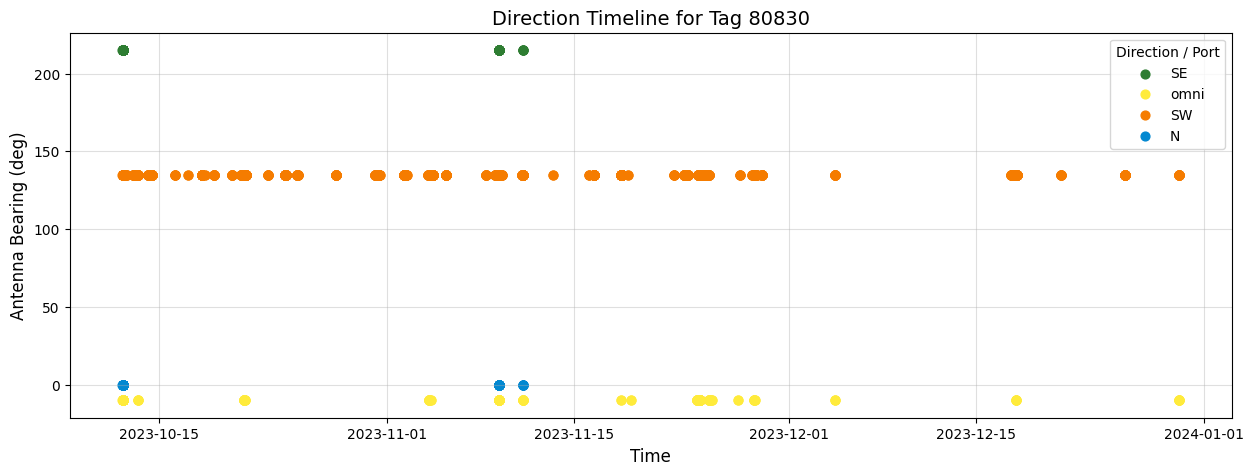

In [26]:
import matplotlib.pyplot as plt

tag = 80830
df_tag = detections_master[detections_master["tagID"] == tag].sort_values("datetime")

plt.figure(figsize=(15, 5))

# Your custom colours (no outline)
color_map = {
    "omni": "#FFEB3B",   # Yellow
    "SW":   "#F57C00",   # Orange
    "SE":   "#2E7D32",   # Green
    "N":    "#0288D1"    # Blue
}

# Plot each direction separately
for direction in df_tag["direction_str"].unique():
    subset = df_tag[df_tag["direction_str"] == direction]
    plt.scatter(
        subset["datetime"],
        subset["bearing_deg"],
        s=40,
        color=color_map.get(direction, "gray"),   # Fills only
        label=f"{direction}"
    )

# Style
plt.title(f"Direction Timeline for Tag {tag}", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Antenna Bearing (deg)", fontsize=12)
plt.grid(True, alpha=0.4)

plt.legend(title="Direction / Port", fontsize=10)
plt.show()


In [27]:
df_tag_sorted = df_tag.sort_values("datetime")
df_tag_sorted["direction_str"].dropna().unique()


array(['SE', 'omni', 'SW', 'N'], dtype=object)

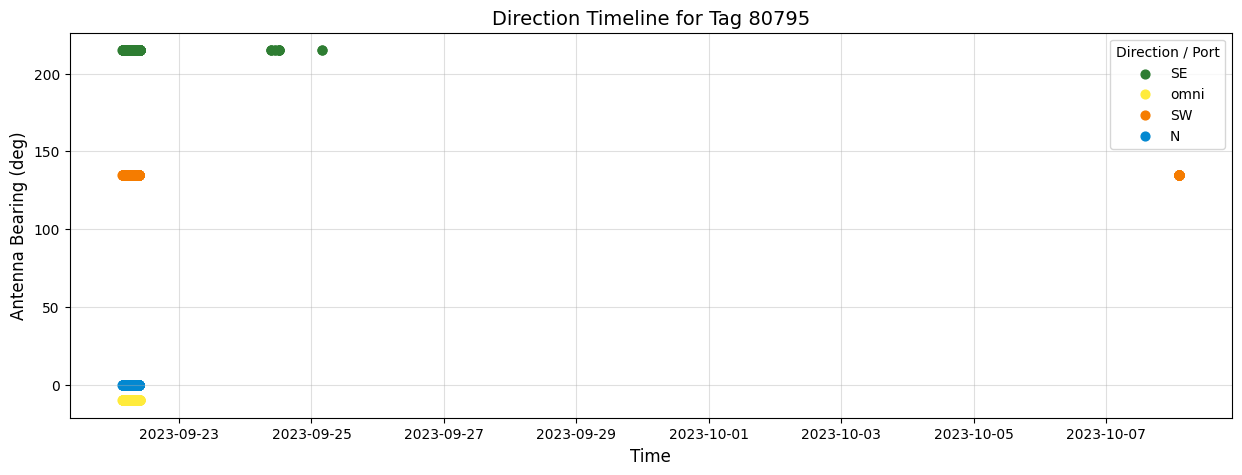

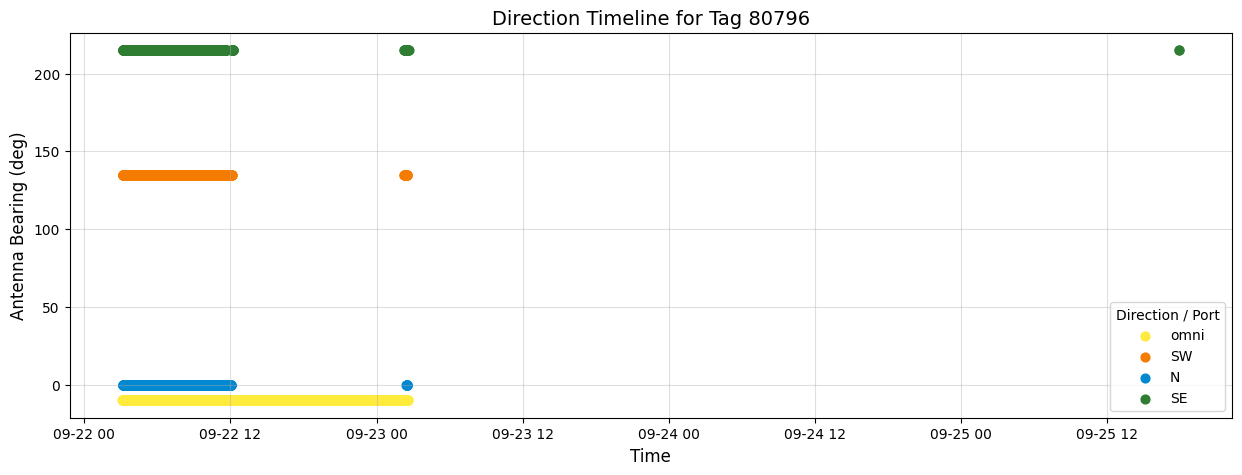

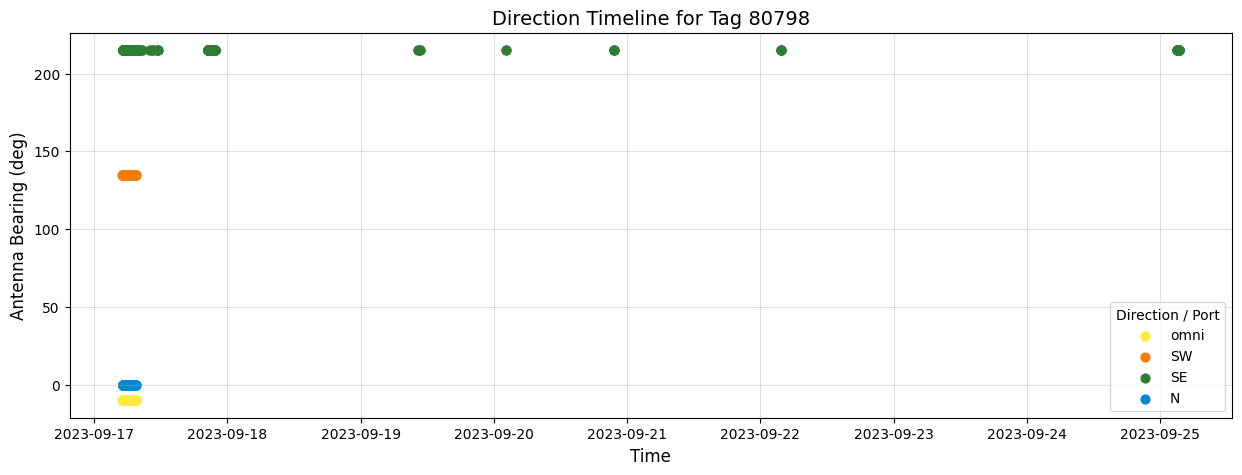

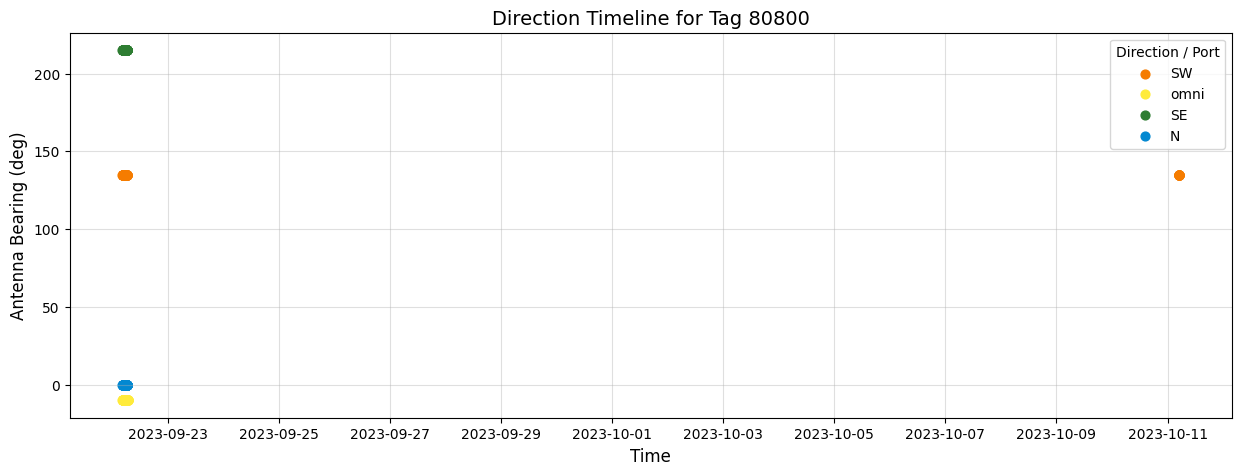

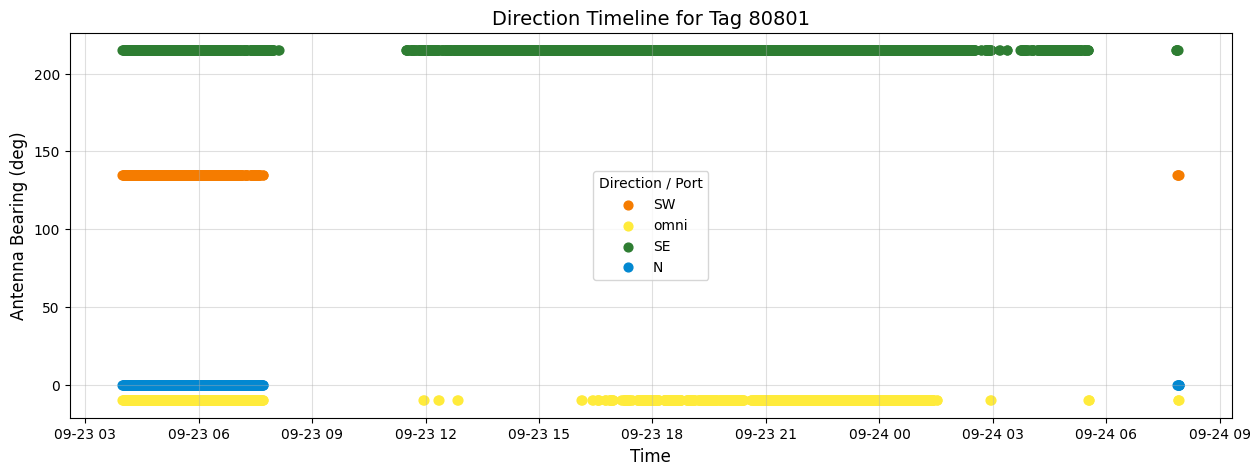

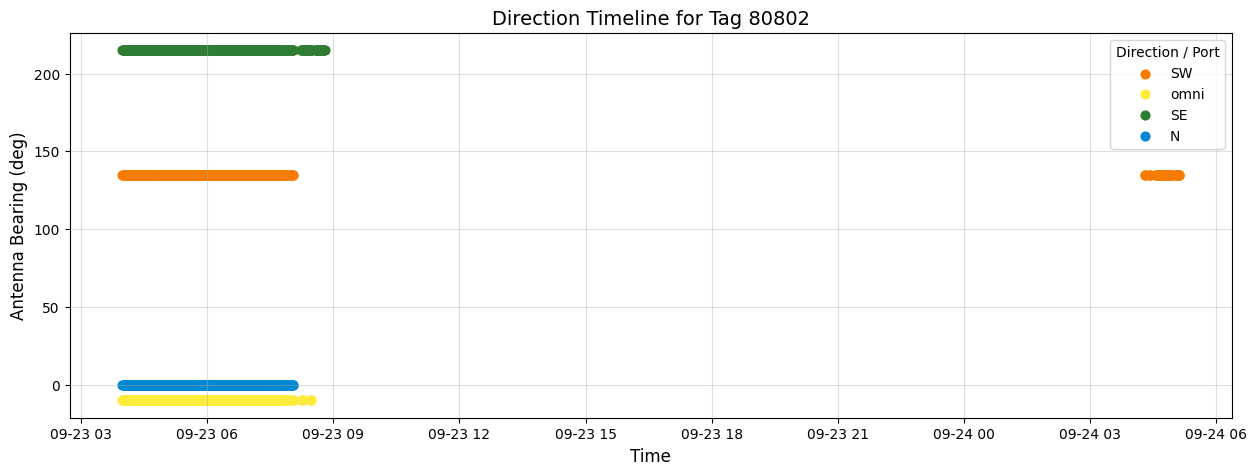

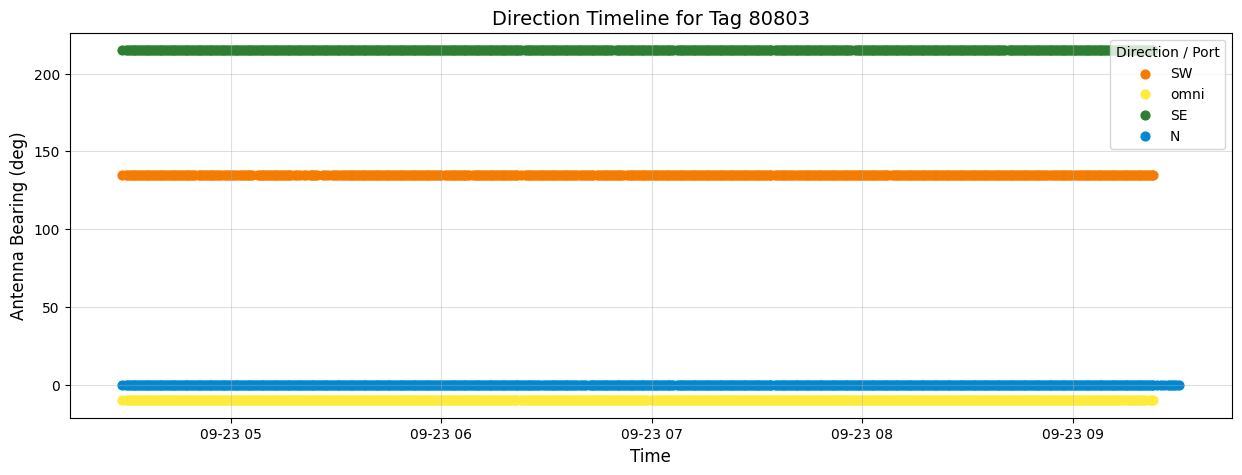

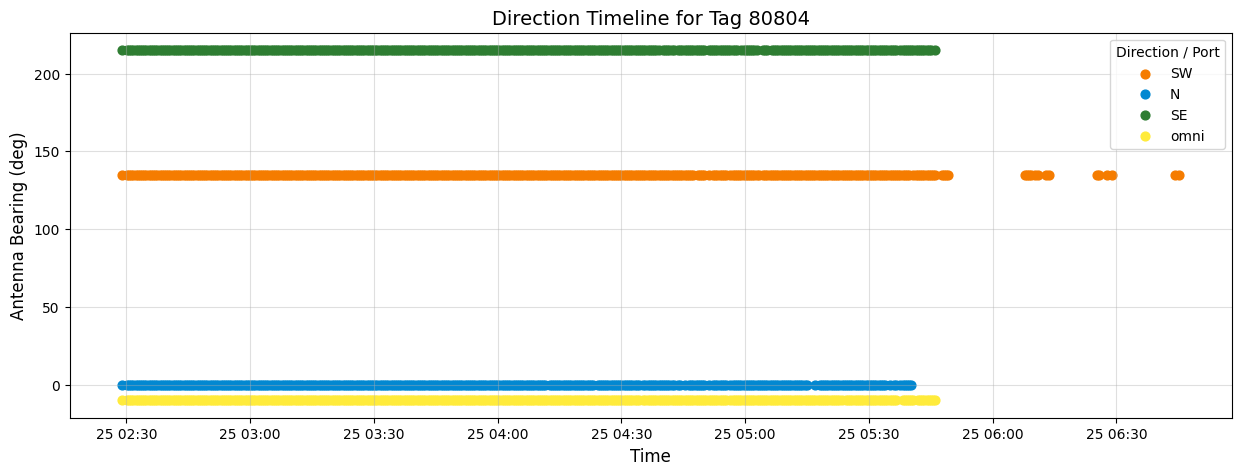

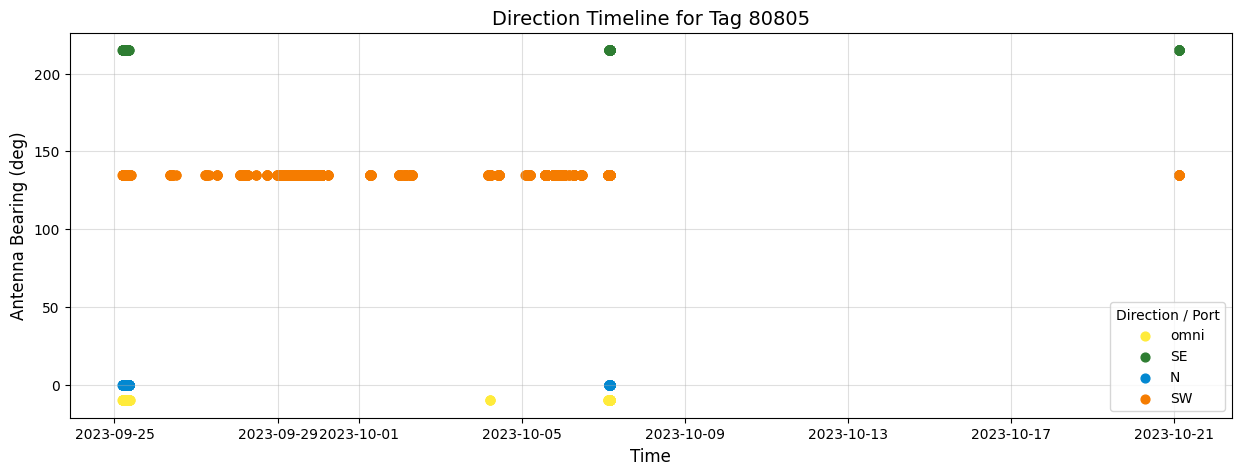

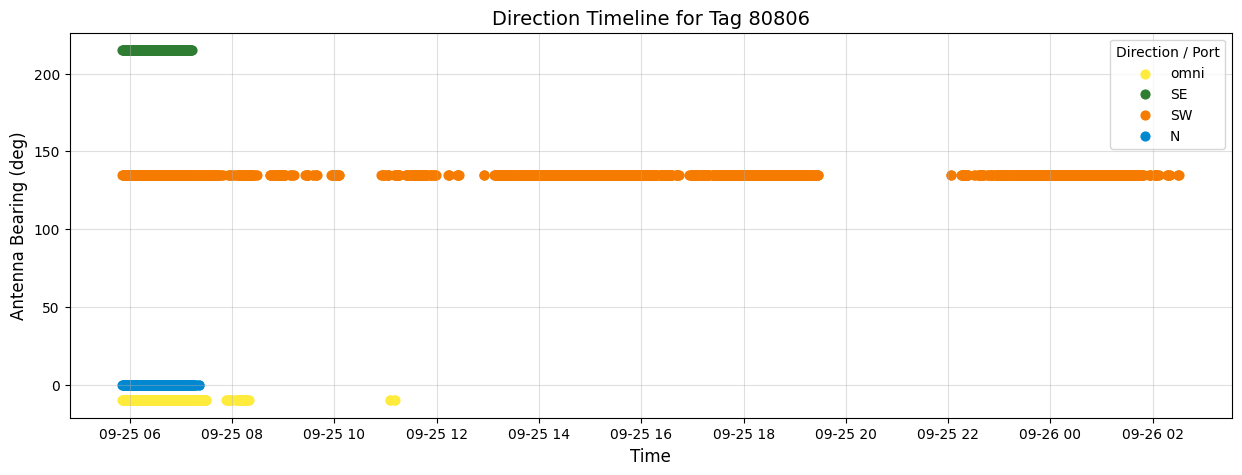

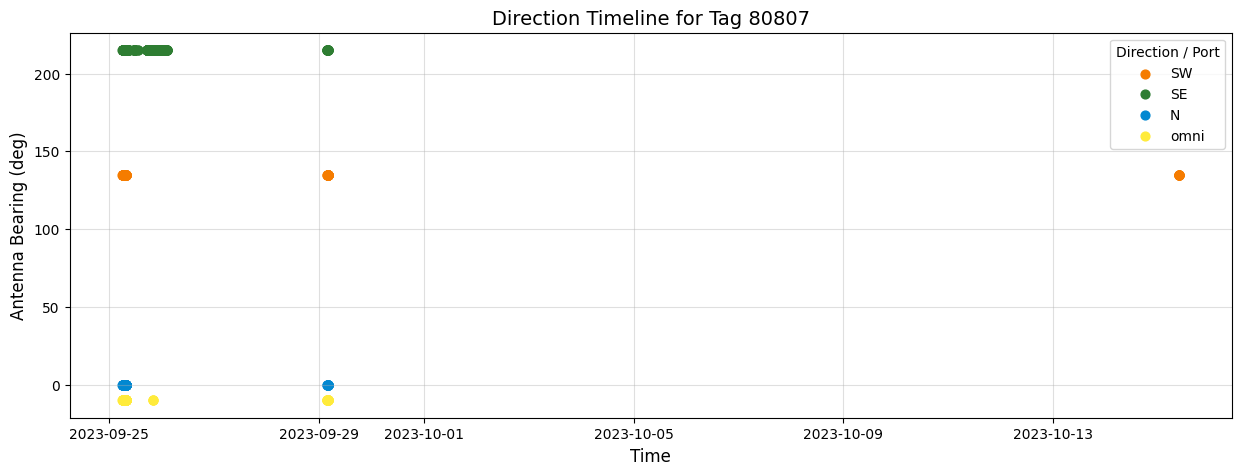

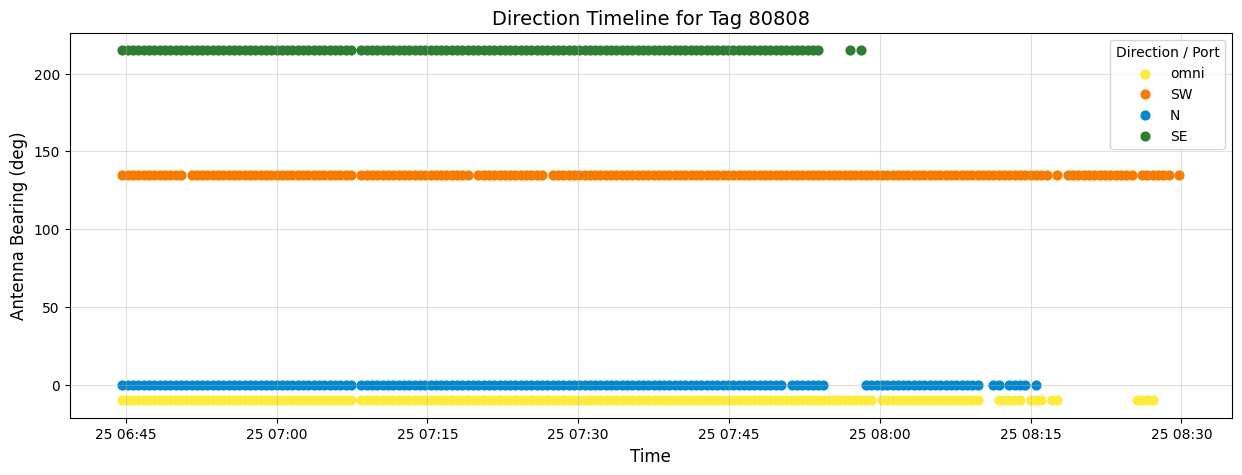

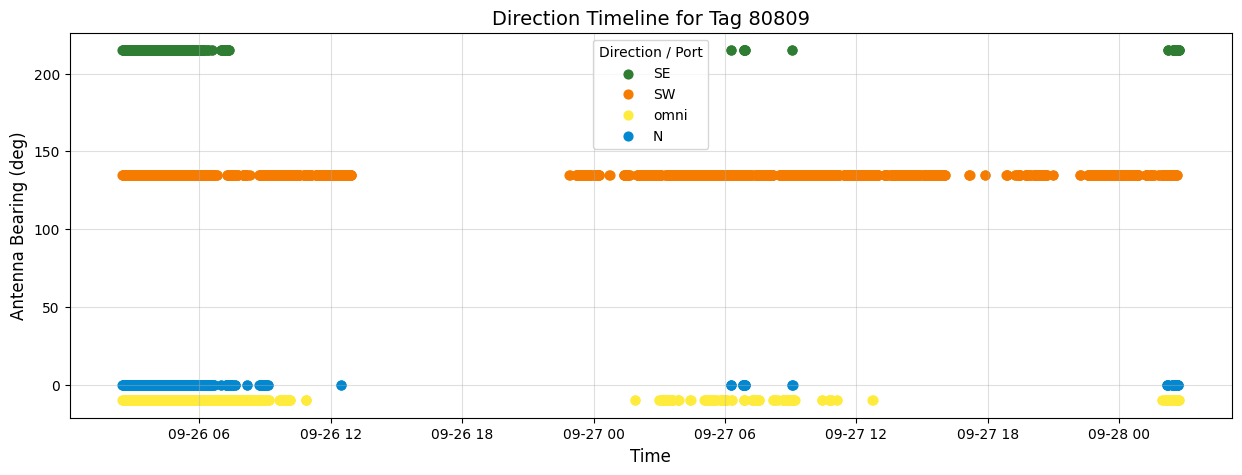

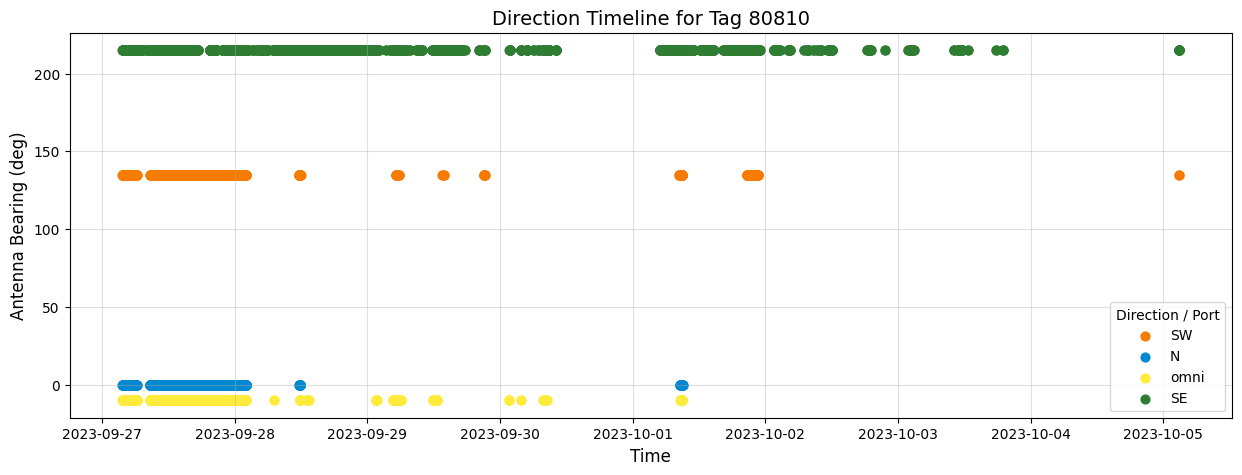

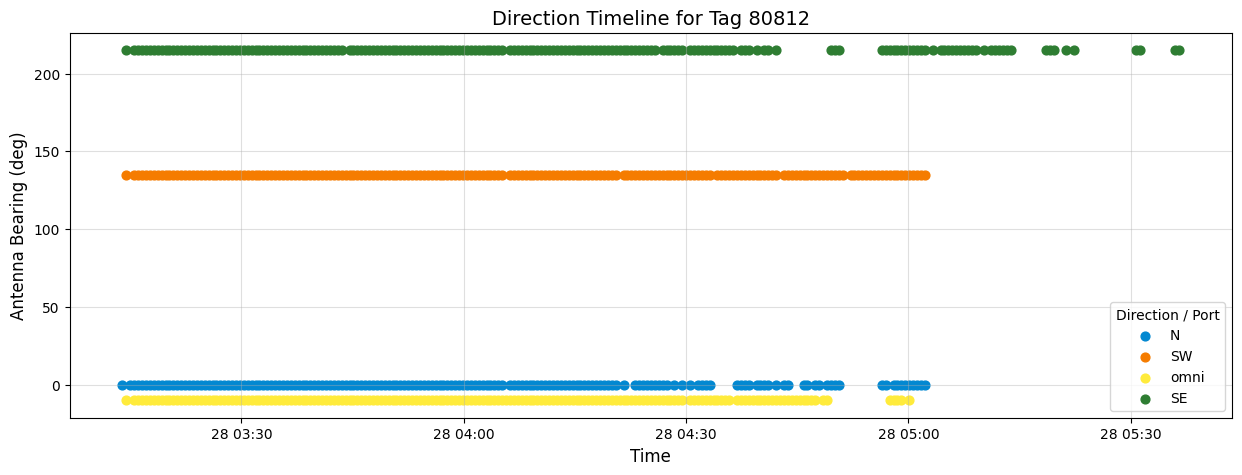

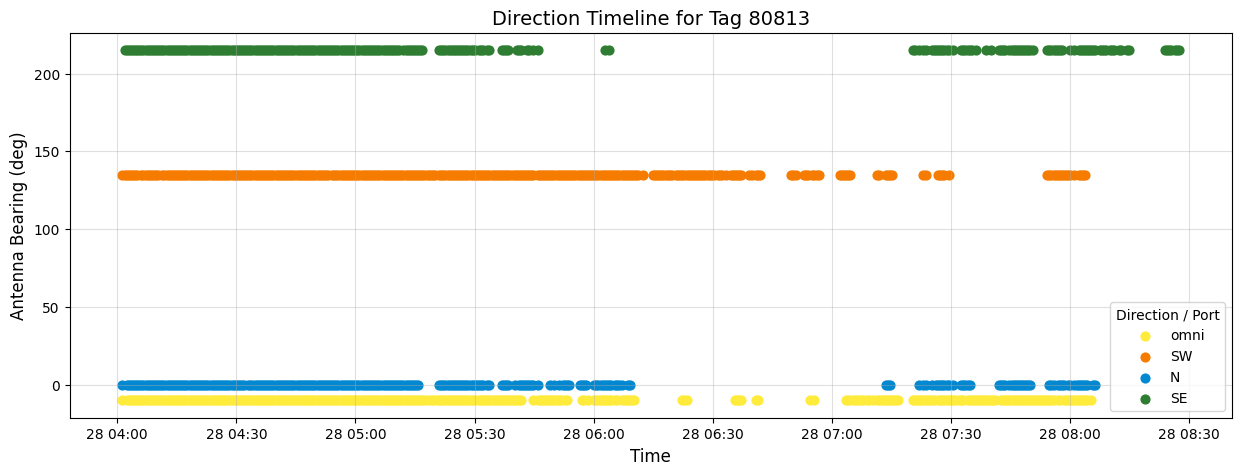

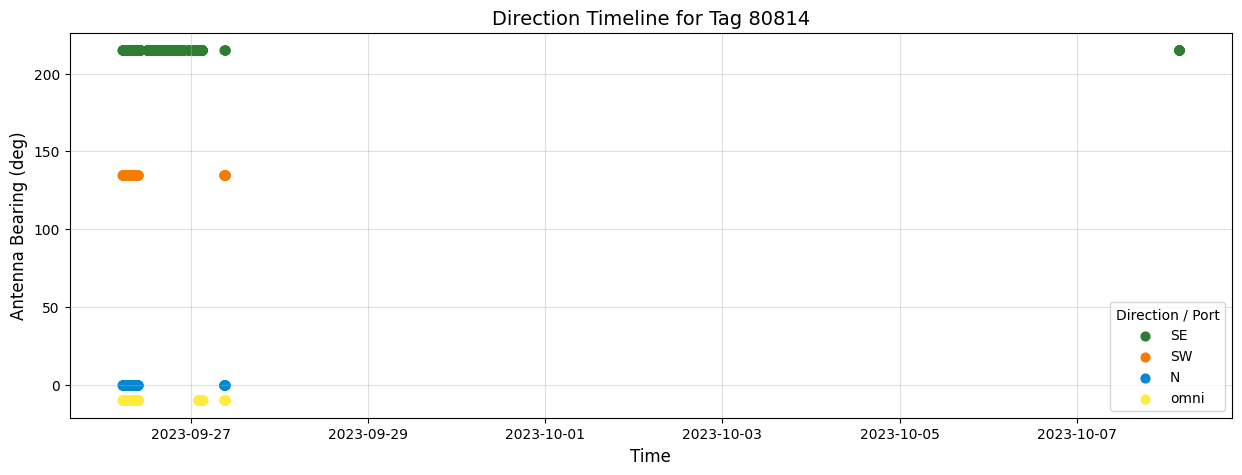

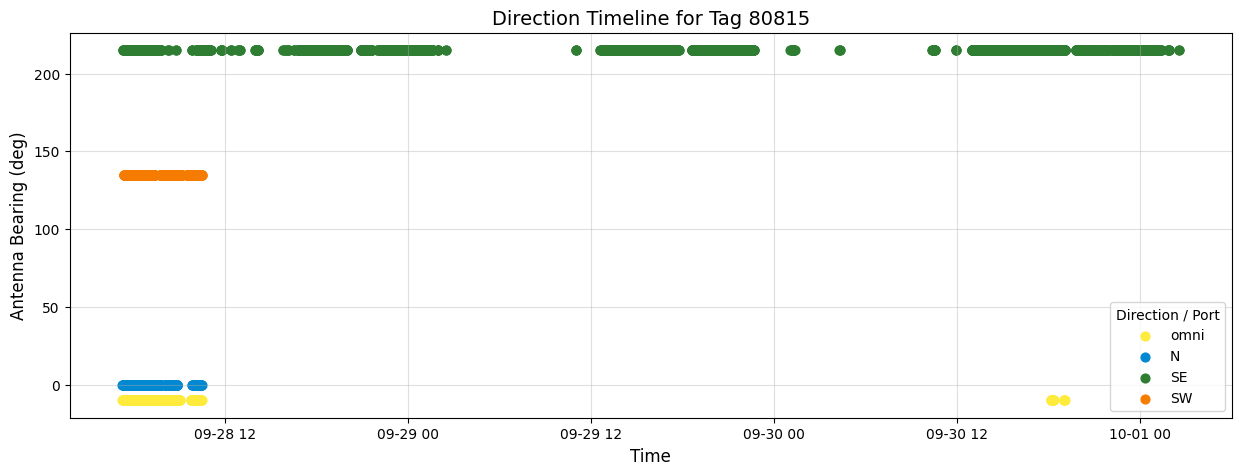

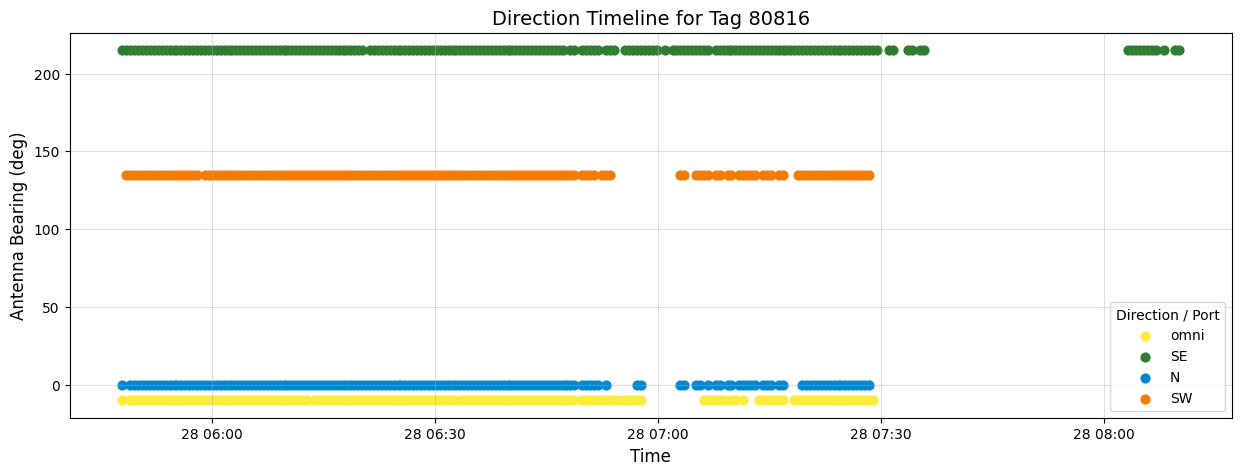

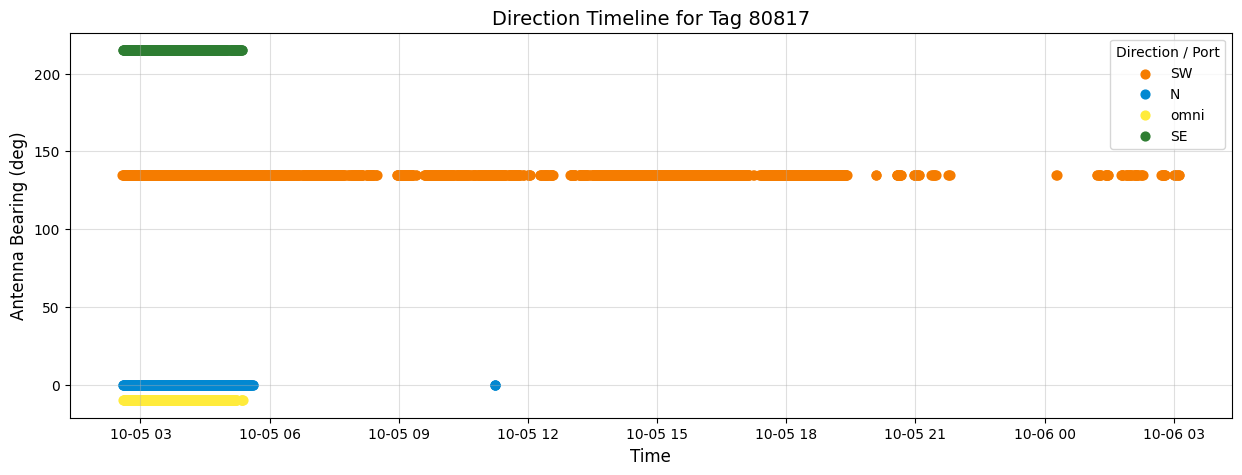

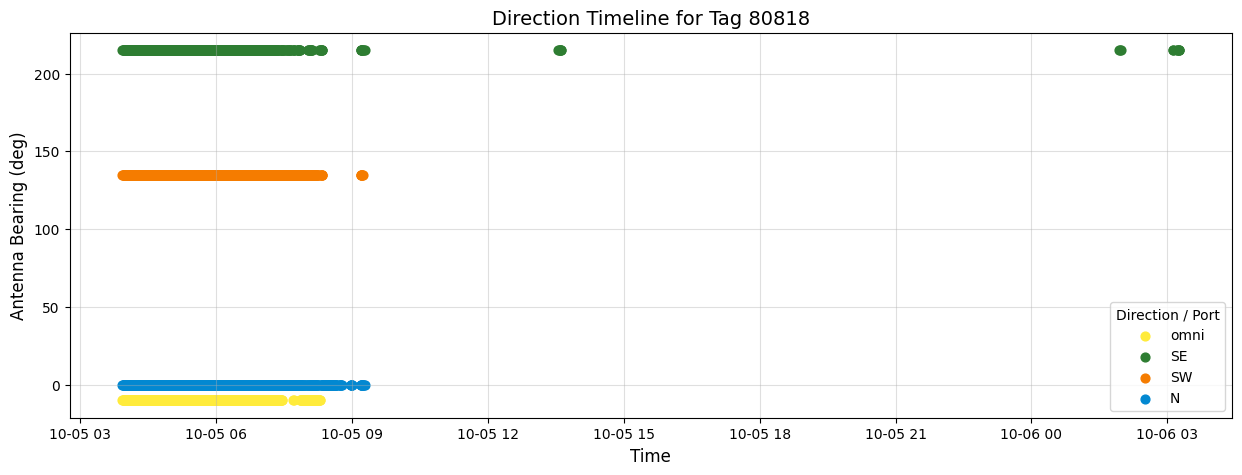

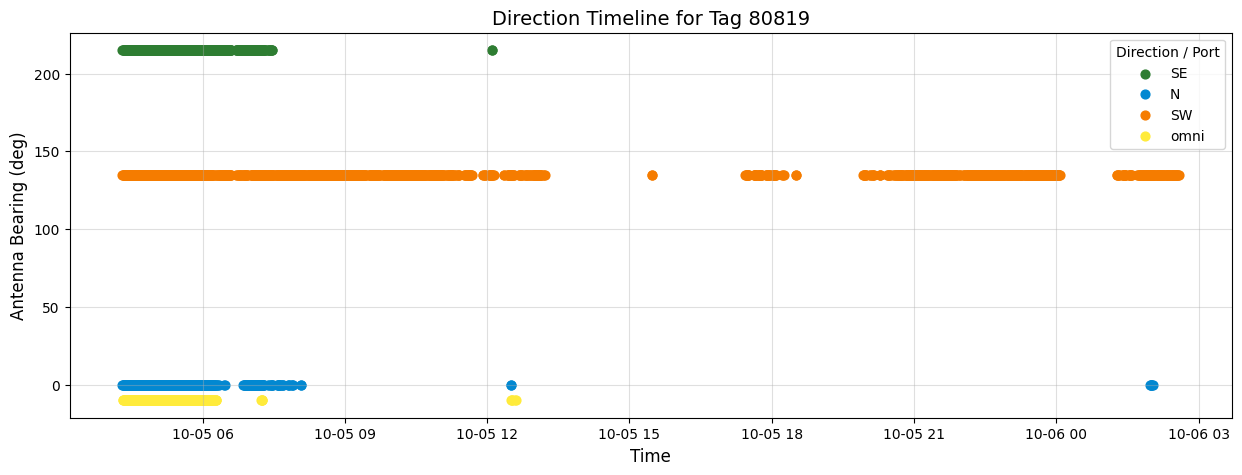

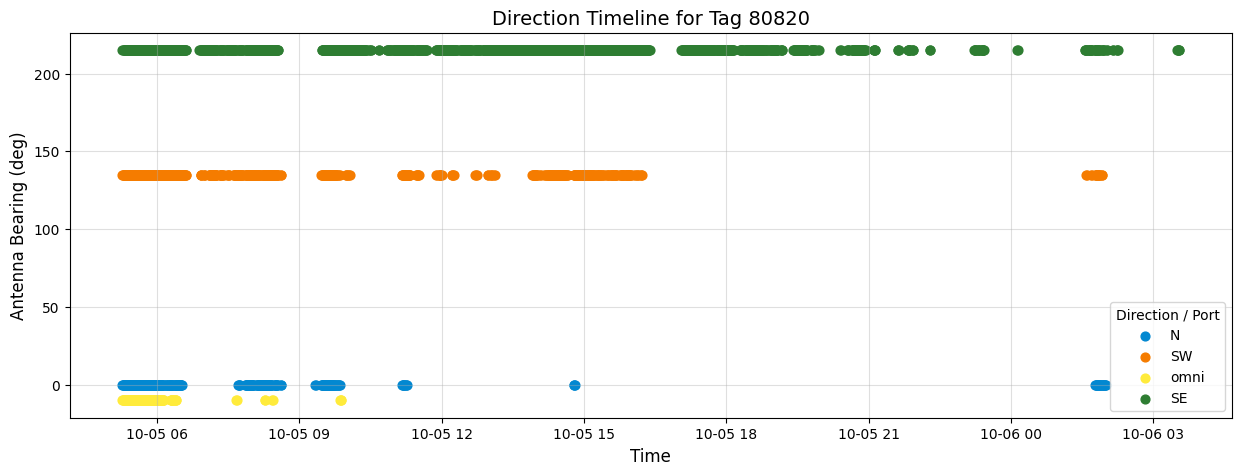

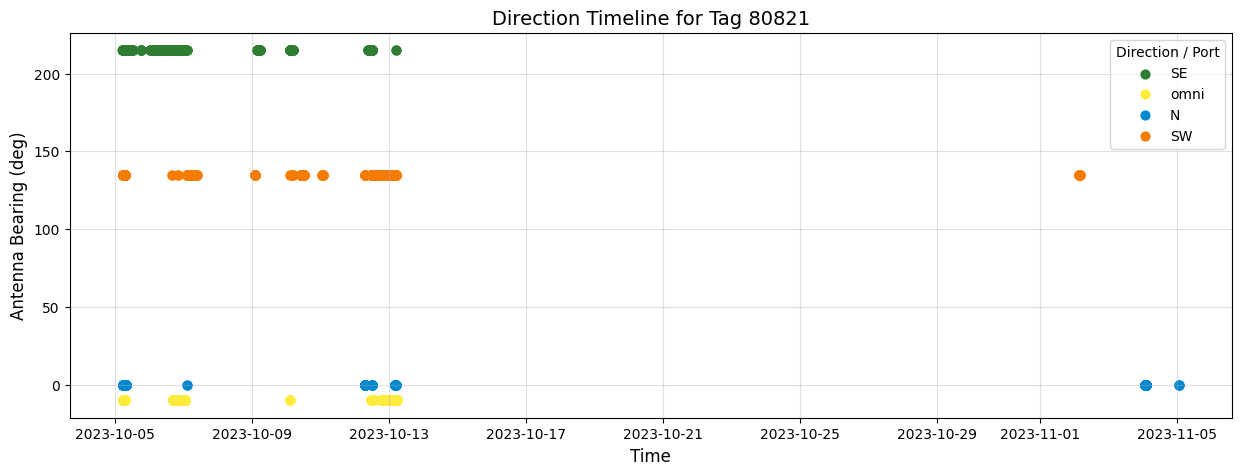

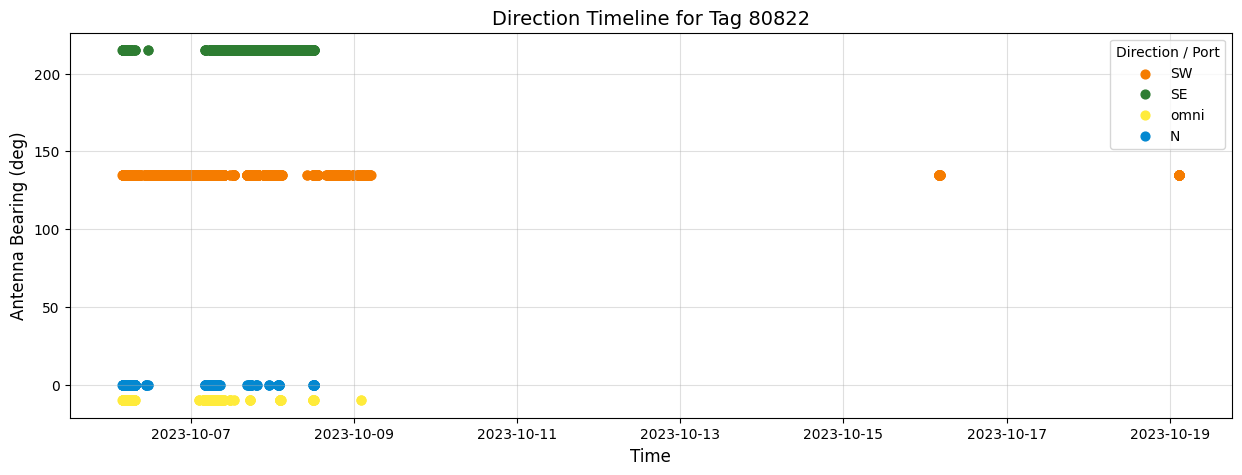

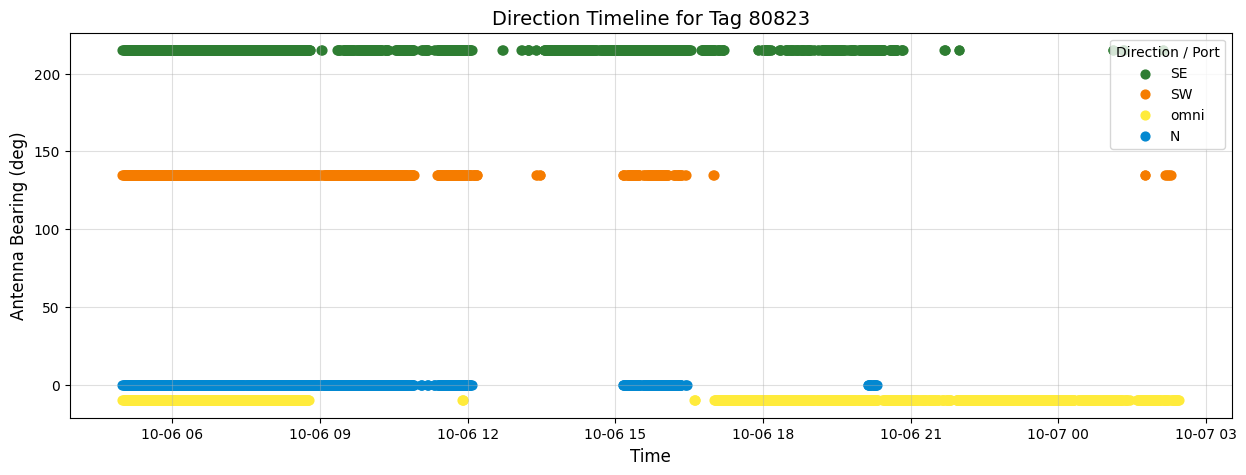

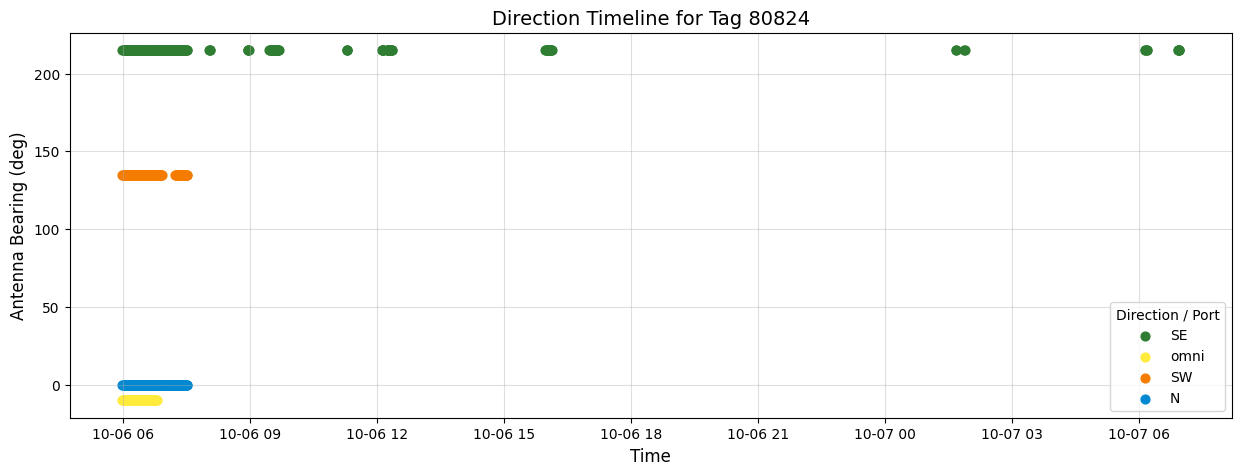

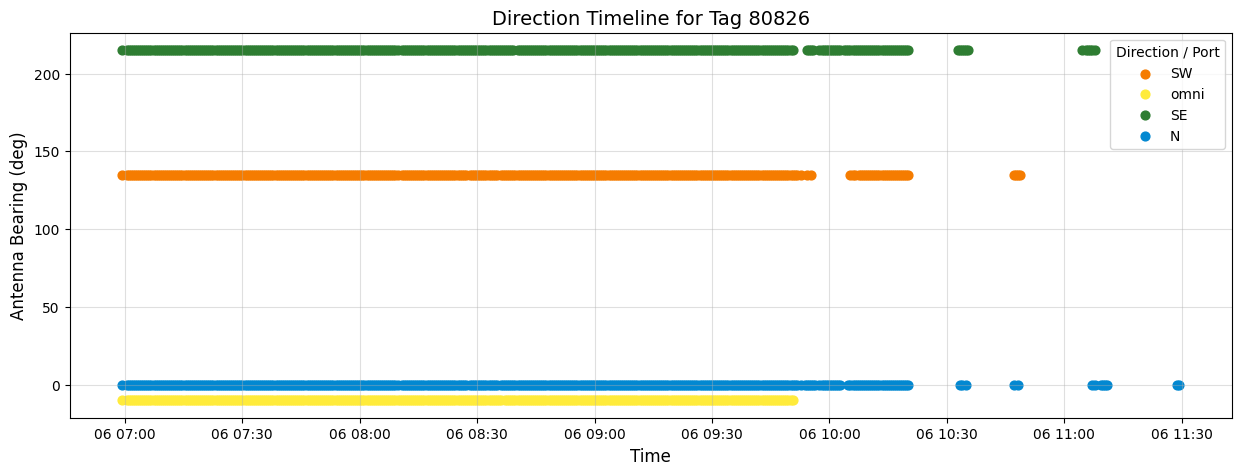

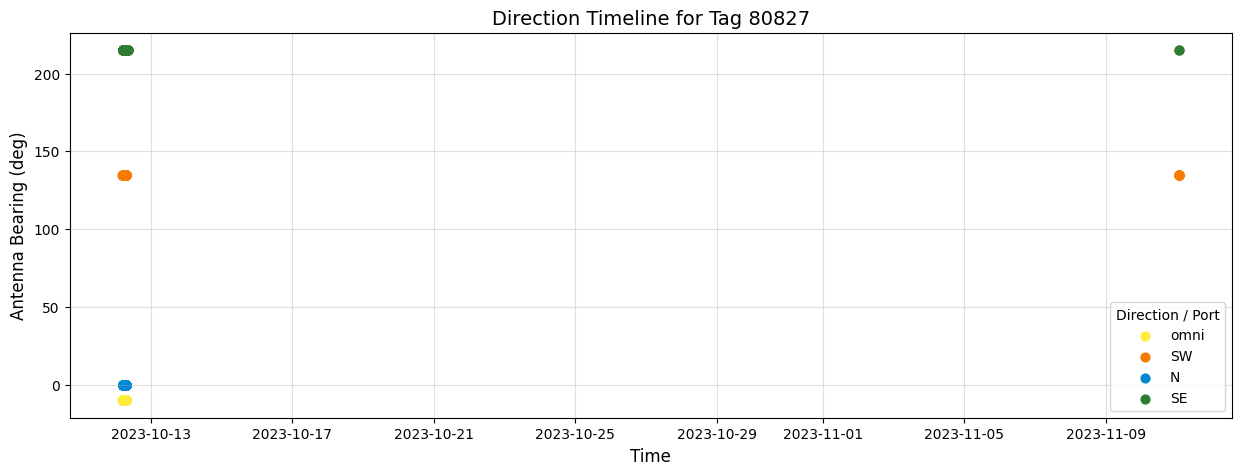

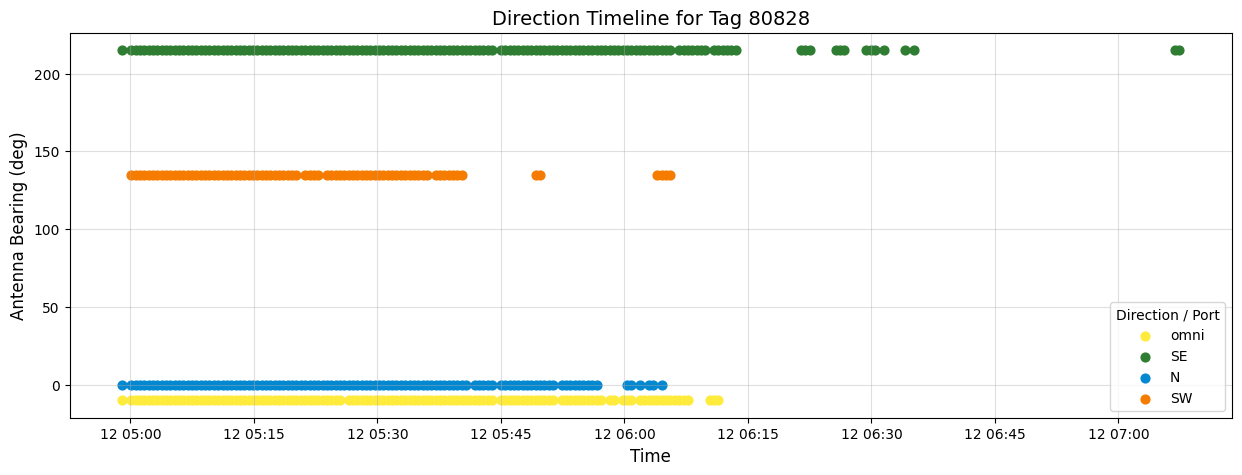

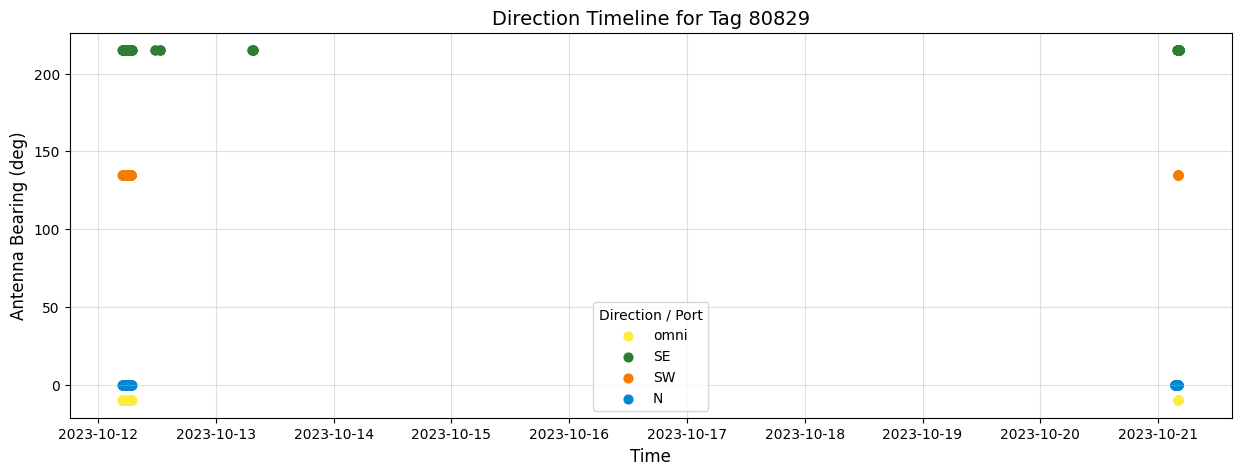

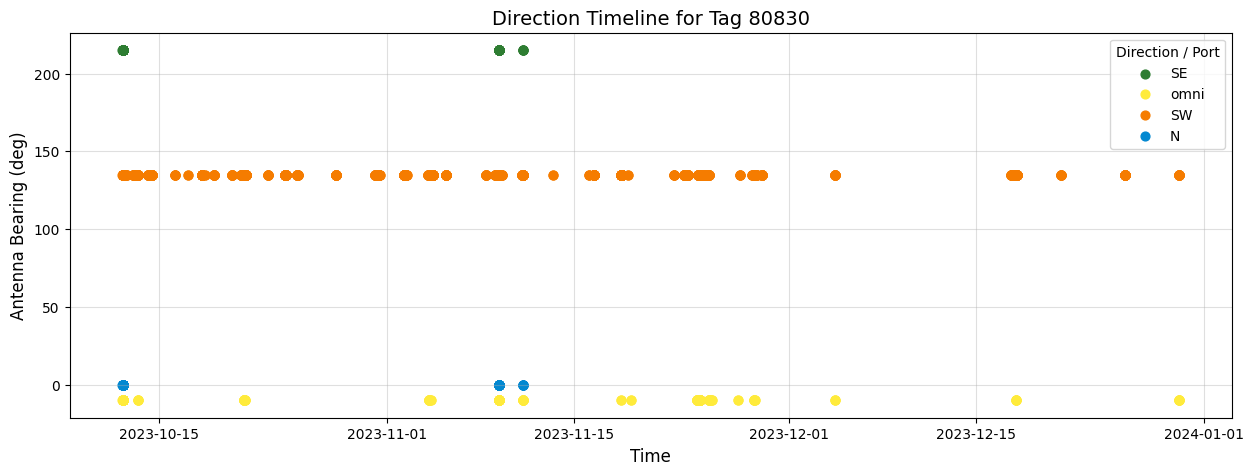

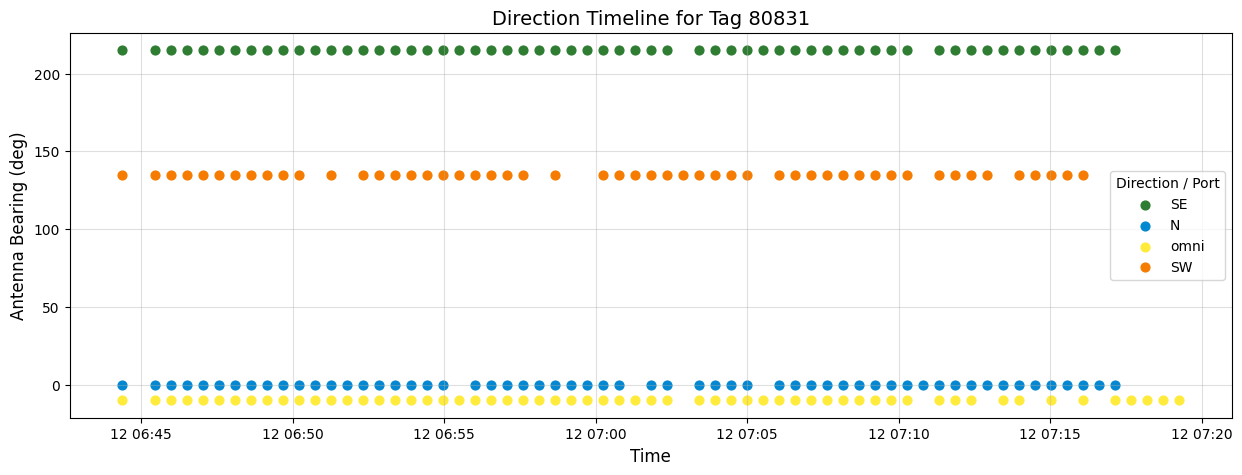

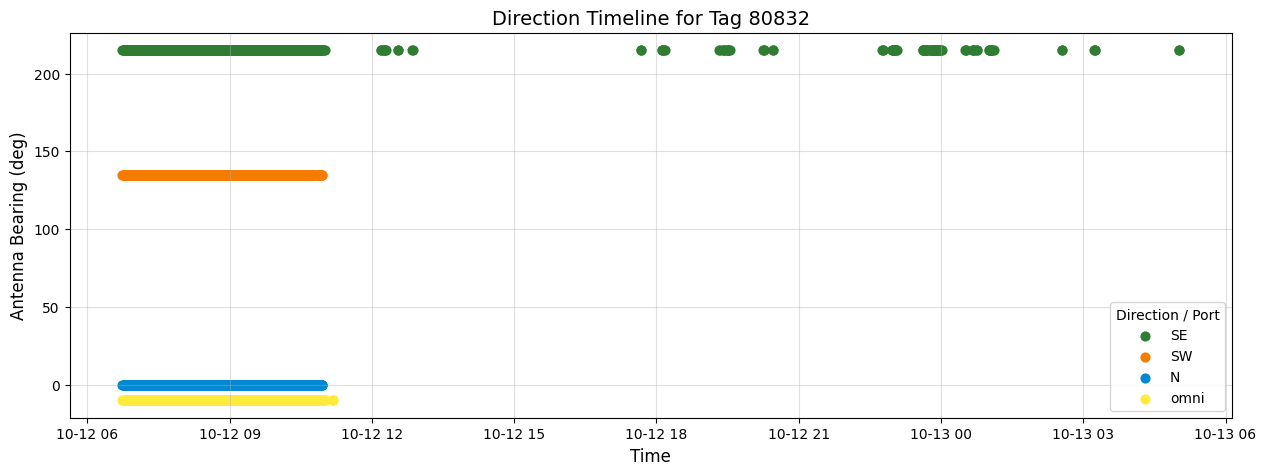

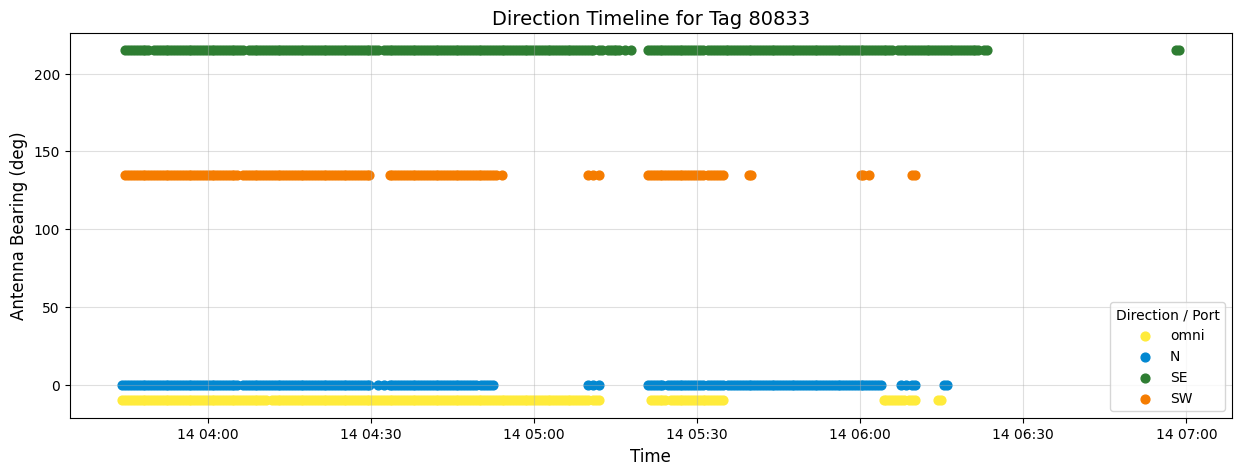

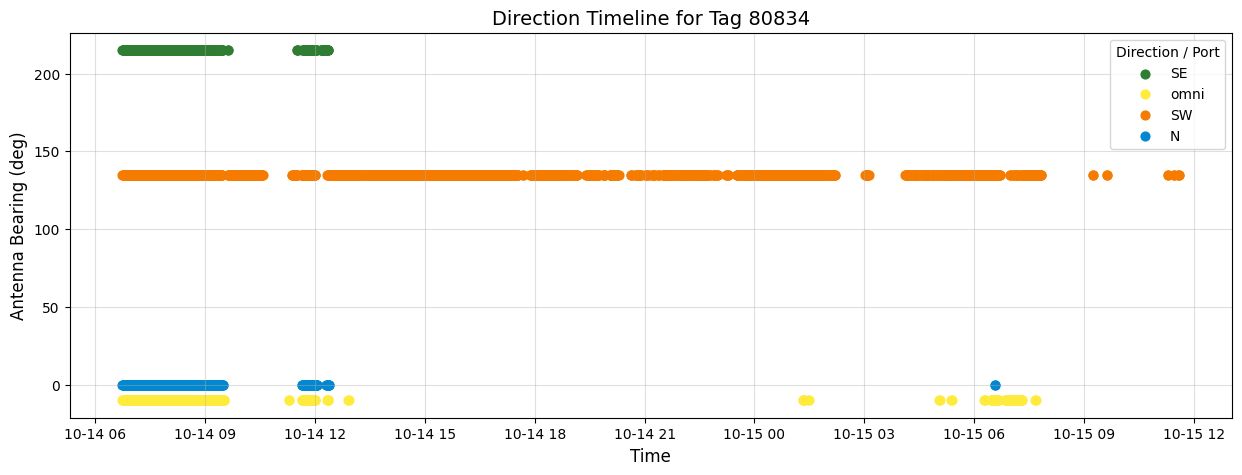

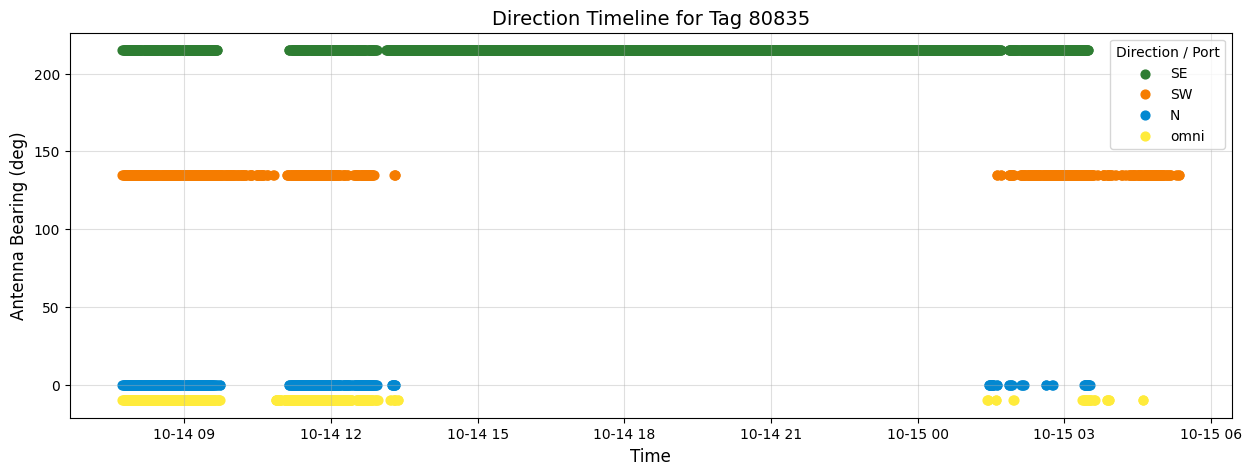

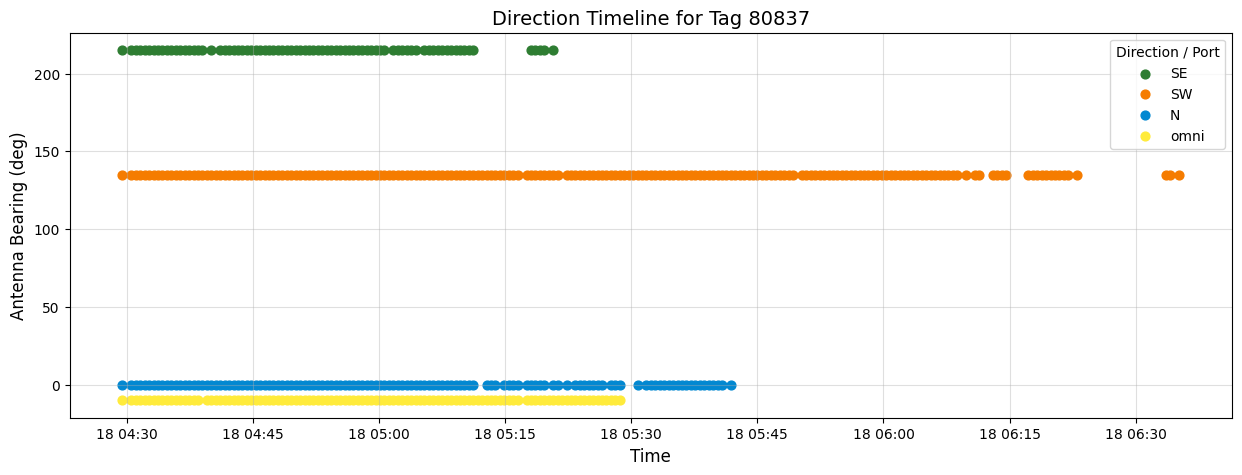

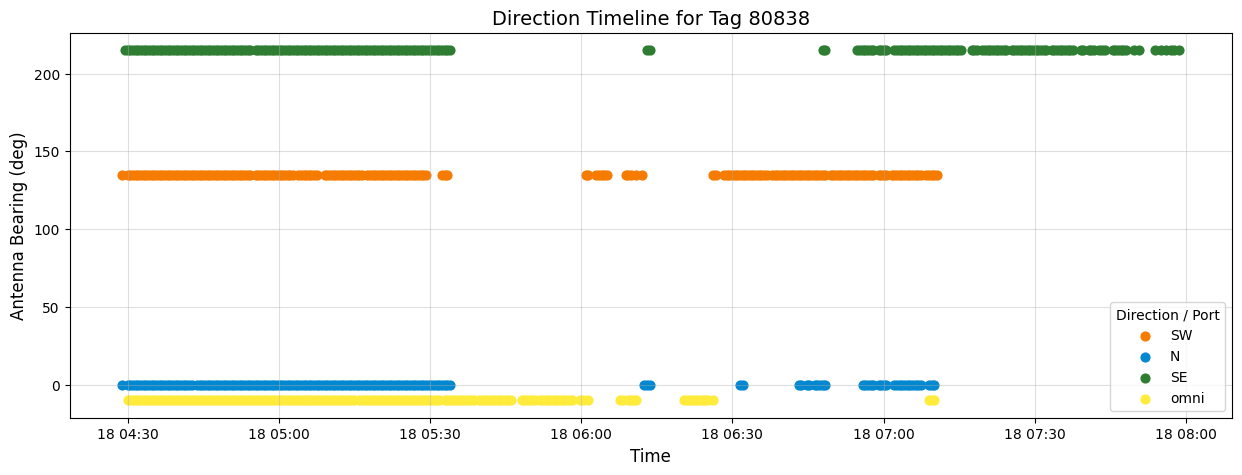

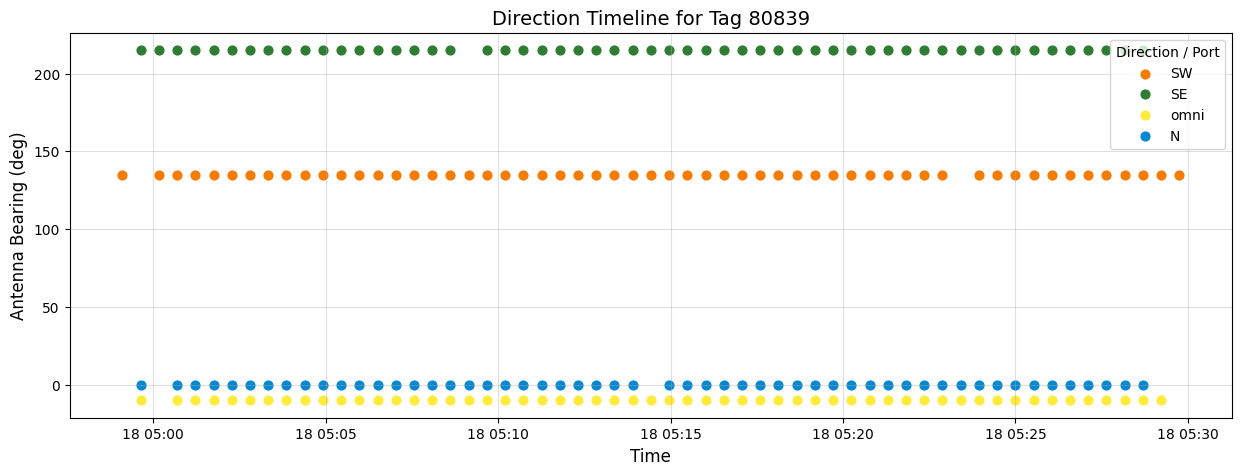

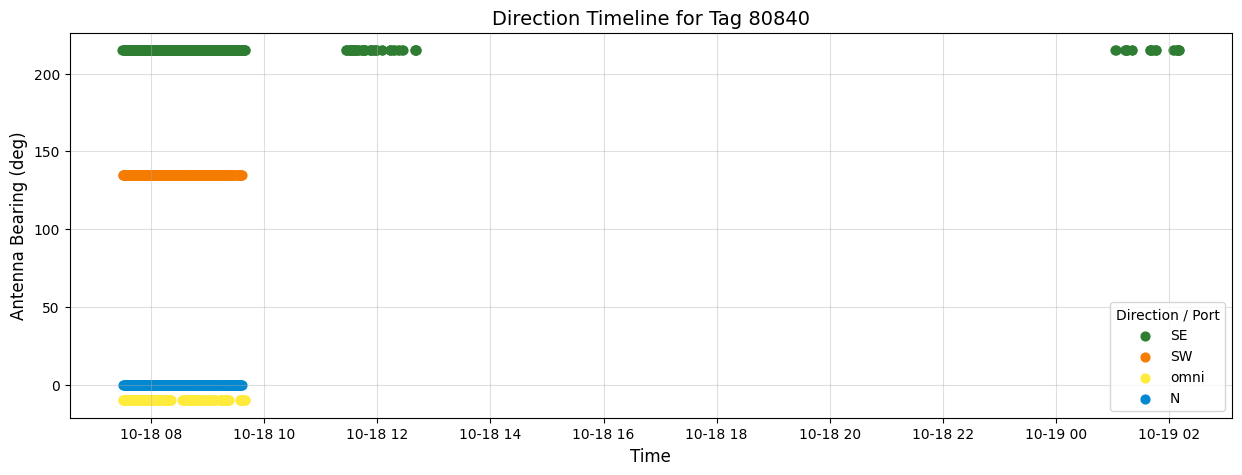

In [28]:
import matplotlib.pyplot as plt

# Custom colours (your palette)
color_map = {
    "omni": "#FFEB3B",   # Yellow
    "SW":   "#F57C00",   # Orange
    "SE":   "#2E7D32",   # Green
    "N":    "#0288D1"    # Blue
}

# Loop all tagIDs
for tag in detections_master["tagID"].unique():
    df_tag = detections_master[detections_master["tagID"] == tag].sort_values("datetime")

    plt.figure(figsize=(15, 5))

    # Plot each direction
    for direction in df_tag["direction_str"].unique():
        subset = df_tag[df_tag["direction_str"] == direction]
        plt.scatter(
            subset["datetime"],
            subset["bearing_deg"],
            s=40,
            color=color_map.get(direction, "gray"),
            label=direction
        )

    # Titles and labels
    plt.title(f"Direction Timeline for Tag {tag}", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Antenna Bearing (deg)", fontsize=12)
    plt.grid(True, alpha=0.4)
    plt.legend(title="Direction / Port")

    # Show the plot inline
    plt.show()


In [29]:

# movement_summaries = []

# for tag in detections_master["tagID"].unique():
#     df_tag = detections_master[detections_master["tagID"] == tag].sort_values("datetime")
    
#     # All directions in time order
#     directions = df_tag["direction_str"].dropna().tolist()
    
#     # Unique directions in time order (movement path)
#     unique_dirs = df_tag["direction_str"].dropna().unique().tolist()
    
#     # Direction transitions count
#     transitions = sum(
#         df_tag["direction_str"].iloc[i] != df_tag["direction_str"].iloc[i-1]
#         for i in range(1, len(df_tag))
#     )
    
#     # Dominant direction (highest count)
#     dominant_dir = df_tag["direction_str"].mode()[0]
    
#     # Direction percentages
#     pct = df_tag["direction_str"].value_counts(normalize=True).to_dict()

#     pct_omni = pct.get("omni", 0)*100
#     pct_SE   = pct.get("SE", 0)*100
#     pct_SW   = pct.get("SW", 0)*100
#     pct_N    = pct.get("N", 0)*100

#     # Detection day range
#     first_dt = df_tag["datetime"].min()
#     last_dt = df_tag["datetime"].max()
    
#     days_active = (last_dt - first_dt).days + 1
    
#     df_tag["date"] = df_tag["datetime"].dt.date
#     detection_days = df_tag["date"].nunique()
    
#     movement_summaries.append({
#         "tagID": tag,
#         "unique_directions": unique_dirs,
#         "direction_transitions": transitions,
#         "dominant_direction": dominant_dir,
#         "pct_omni": pct_omni,
#         "pct_SE": pct_SE,
#         "pct_SW": pct_SW,
#         "pct_N": pct_N,
#         "detections": len(df_tag),
#         "first_detection": first_dt,
#         "last_detection": last_dt,
#         "detection_days": detection_days,
#         "days_active": days_active
#     })

# movement_summary_df = pd.DataFrame(movement_summaries)
# movement_summary_df

In [30]:

# # plot to decide for the threshold for movment categories

# plt.figure(figsize=(10, 5))
# plt.hist(movement_summary_df["detection_days"], bins=20, color="#2E7D32", edgecolor="black")
# plt.title("Distribution of Detection Days Across All Owls")
# plt.xlabel("Detection Days")
# plt.ylabel("Number of Owls")
# plt.grid(alpha=0.3)
# plt.show()

In [31]:
# movement_summary_df[["tagID", "detection_days"]].sort_values("detection_days")


In [32]:
# movement_summary_df["detection_days"].describe()


In [33]:
movement_summaries = []

for tag in detections_master["tagID"].unique():
    
    # Select and sort detections for this tag
    df_tag = detections_master[detections_master["tagID"] == tag].sort_values("datetime")
    
    # Direction sequences
    all_dirs = df_tag["direction_str"].dropna().tolist()
    unique_dirs = df_tag["direction_str"].dropna().unique().tolist()
    
    # Count direction transitions (changes between consecutive detections)
    transitions = sum(
        df_tag["direction_str"].iloc[i] != df_tag["direction_str"].iloc[i-1]
        for i in range(1, len(df_tag))
    )
    
    # Dominant direction
    dominant_dir = df_tag["direction_str"].mode()[0]
    
    # Direction percentages
    pct = df_tag["direction_str"].value_counts(normalize=True).to_dict()
    pct_omni = pct.get("omni", 0)*100
    pct_SE   = pct.get("SE", 0)*100
    pct_SW   = pct.get("SW", 0)*100
    pct_N    = pct.get("N", 0)*100

    # Detection dates
    first_dt = df_tag["datetime"].min()
    last_dt  = df_tag["datetime"].max()
    
    days_active = (last_dt - first_dt).days + 1  # Total span
    df_tag["date"] = df_tag["datetime"].dt.date
    detection_days = df_tag["date"].nunique()     # Unique days detected

    # ===============================
    #  FINAL DATA-DRIVEN CATEGORIES
    # ===============================
    if detection_days == 1:
        movement_category = "One-night Passage"
    elif 2 <= detection_days <= 5:
        movement_category = "Short-stay Migrant"
    elif 6 <= detection_days <= 9:
        movement_category = "Extended Stopover"
    elif 10 <= detection_days <= 20:
        movement_category = "Multi-day Owl"
    elif detection_days >= 25:
        movement_category = "Long-stay Owl"
    else:
        movement_category = "Unknown"

    # Summary sentence (for reports or dashboard)
    summary_text = (
        f"Tag {tag} detected on {detection_days} days with {transitions} movement transitions. "
        f"Dominant direction: {dominant_dir}. Category: {movement_category}. "
        f"Path: {' → '.join(unique_dirs)}."
    )

    # Save summary
    movement_summaries.append({
        "tagID": tag,
        "unique_directions": unique_dirs,
        "direction_transitions": transitions,
        "dominant_direction": dominant_dir,
        "pct_omni": pct_omni,
        "pct_SE": pct_SE,
        "pct_SW": pct_SW,
        "pct_N": pct_N,
        "detections": len(df_tag),
        "first_detection": first_dt,
        "last_detection": last_dt,
        "detection_days": detection_days,
        "days_active": days_active,
        "movement_category": movement_category,
        "summary": summary_text
    })

# Convert to DataFrame
movement_summary_df = pd.DataFrame(movement_summaries)

movement_summary_df


,tagID,unique_directions,direction_transitions,dominant_direction,pct_omni,pct_SE,pct_SW,pct_N,detections,first_detection,last_detection,detection_days,days_active,movement_category,summary
0,80795,"[SE, omni, SW, N]",2080,omni,27.906977,22.882060,22.965116,26.245847,2408,2023-09-22 03:29:12.296499968,2023-10-08 02:34:56.999200106,4,16,Short-stay Migrant,Tag 80795 detected on 4 days with 2080 movemen...
1,80796,"[omni, SW, N, SE]",3867,omni,46.000000,18.036036,18.468468,17.495495,5550,2023-09-22 03:08:45.901499987,2023-09-25 17:54:07.227699995,3,4,Short-stay Migrant,Tag 80796 detected on 3 days with 3867 movemen...
2,80798,"[omni, SW, SE, N]",988,SE,23.338870,32.225914,22.176080,22.259136,1204,2023-09-17 05:06:58.385099888,2023-09-25 03:28:53.065000057,5,8,Short-stay Migrant,Tag 80798 detected on 5 days with 988 movement...
3,80800,"[SW, omni, SE, N]",740,omni,27.349398,25.783133,20.602410,26.265060,830,2023-09-22 04:27:23.221800089,2023-10-11 05:03:53.091700077,2,20,Short-stay Migrant,Tag 80800 detected on 2 days with 740 movement...
4,80801,"[SW, omni, SE, N]",2740,SE,29.052780,51.979265,9.213007,9.754948,4244,2023-09-23 03:59:24.295399904,2023-09-24 07:55:34.963099957,2,2,Short-stay Migrant,Tag 80801 detected on 2 days with 2740 movemen...
5,80802,"[SW, omni, SE, N]",1636,SE,24.253934,26.424308,25.067824,24.253934,1843,2023-09-23 03:59:22.998399973,2023-09-24 05:07:01.935600042,2,2,Short-stay Migrant,Tag 80802 detected on 2 days with 1636 movemen...
6,80803,"[SW, omni, SE, N]",1989,N,25.182482,25.091241,24.178832,25.547445,2192,2023-09-23 04:29:11.520499944,2023-09-23 09:30:17.847300053,1,1,One-night Passage,Tag 80803 detected on 1 days with 1989 movemen...
7,80804,"[SW, N, SE, omni]",1348,SW,25.102599,24.897401,26.333789,23.666211,1462,2023-09-25 02:29:03.864000082,2023-09-25 06:45:15.439100027,1,1,One-night Passage,Tag 80804 detected on 1 days with 1348 movemen...
8,80805,"[omni, SE, N, SW]",1684,SW,12.762646,11.413748,63.450065,12.373541,3855,2023-09-25 04:43:24.953299999,2023-10-21 02:53:12.563999891,13,26,Multi-day Owl,Tag 80805 detected on 13 days with 1684 moveme...
9,80806,"[omni, SE, SW, N]",685,SW,10.921325,7.919255,72.877847,8.281573,1932,2023-09-25 05:51:21.110699892,2023-09-26 02:31:11.818399906,2,1,Short-stay Migrant,Tag 80806 detected on 2 days with 685 movement...


In [34]:
movement_summary_df.sort_values("direction_transitions", ascending=False).head()


,tagID,unique_directions,direction_transitions,dominant_direction,pct_omni,pct_SE,pct_SW,pct_N,detections,first_detection,last_detection,detection_days,days_active,movement_category,summary
13,80810,"[SW, N, omni, SE]",7814,SE,18.544601,44.698073,18.285576,18.471750,12354,2023-09-27 03:44:26.923799992,2023-10-05 02:52:42.569499969,8,8,Extended Stopover,Tag 80810 detected on 8 days with 7814 movemen...
1,80796,"[omni, SW, N, SE]",3867,omni,46.000000,18.036036,18.468468,17.495495,5550,2023-09-22 03:08:45.901499987,2023-09-25 17:54:07.227699995,3,4,Short-stay Migrant,Tag 80796 detected on 3 days with 3867 movemen...
23,80821,"[SE, omni, N, SW]",3442,SE,28.054491,38.186462,28.976870,4.782177,7047,2023-10-05 05:33:27.557699919,2023-11-05 01:19:45.635400057,11,31,Multi-day Owl,Tag 80821 detected on 11 days with 3442 moveme...
24,80822,"[SW, SE, omni, N]",3367,SW,5.158236,36.257164,50.411164,8.173436,8026,2023-10-06 03:59:22.256000041,2023-10-19 02:46:09.824100018,6,13,Extended Stopover,Tag 80822 detected on 6 days with 3367 movemen...
25,80823,"[SE, SW, omni, N]",3103,omni,31.160755,29.018885,19.415016,20.405343,4342,2023-10-06 04:59:06.163300037,2023-10-07 02:27:33.081399918,2,1,Short-stay Migrant,Tag 80823 detected on 2 days with 3103 movemen...


In [35]:
movement_summary_df[movement_summary_df["tagID"].isin([80830,80821,80805])]


,tagID,unique_directions,direction_transitions,dominant_direction,pct_omni,pct_SE,pct_SW,pct_N,detections,first_detection,last_detection,detection_days,days_active,movement_category,summary
8,80805,"[omni, SE, N, SW]",1684,SW,12.762646,11.413748,63.450065,12.373541,3855,2023-09-25 04:43:24.953299999,2023-10-21 02:53:12.563999891,13,26,Multi-day Owl,Tag 80805 detected on 13 days with 1684 moveme...
23,80821,"[SE, omni, N, SW]",3442,SE,28.054491,38.186462,28.976870,4.782177,7047,2023-10-05 05:33:27.557699919,2023-11-05 01:19:45.635400057,11,31,Multi-day Owl,Tag 80821 detected on 11 days with 3442 moveme...
31,80830,"[SE, omni, SW, N]",954,SW,13.989962,7.057716,71.831870,7.120452,3188,2023-10-12 05:44:07.535700083,2023-12-30 04:13:10.848200083,36,79,Long-stay Owl,Tag 80830 detected on 36 days with 954 movemen...


In [36]:
movement_summary_df.shape

(41, 15)

# Download the movement_summary set

In [37]:
# movement_summary_df.to_csv("movement_summary.csv", index=False)


In [38]:
movement_summary_df.to_csv("movement_summary.csv", index=False)

# EDA

## **9.1 Dataset Overview**

In this section, we examine the structure and basic properties of the cleaned detection dataset.  
We review dataset dimensions, data types, and missing values to ensure the data is ready for analysis and modeling.

### 🔍 What we examine:
- Number of rows and columns  
- Column data types  
- Missing value distribution  
- Quick statistical summary of numerical fields  

This step helps verify data quality and highlights any potential issues (e.g., missing deployment metadata, SNR gaps, incorrectly typed values).


Rows: 102776
Columns: 40

Column Types:


hitID                           float64
runID                           float64
batchID                         float64
ts                              float64
tsCorrected                     float64
DATE                     datetime64[ns]
TIME                     datetime64[ns]
sig                             float64
sigsd                           float64
noise                           float64
snr                             float64
freq                            float64
freqsd                          float64
slop                            float64
burstSlop                       float64
motusTagID                      float64
port                            float64
antBearing                      float64
runLen                          float64
motusFilter                     float64
tagID                             int64
source_sheet                     object
datetime                 datetime64[ns]
manufacturer                     object
model                            object



Missing Values:


hitID                   0
runID                   0
batchID                 0
ts                      0
tsCorrected             0
DATE                    0
TIME                    0
sig                     0
sigsd                   0
noise                   0
snr                   752
freq                    0
freqsd                  0
slop                    0
burstSlop               0
motusTagID              0
port                    0
antBearing          20597
runLen                  0
motusFilter             0
tagID                   0
source_sheet            0
datetime                0
manufacturer            0
model                   0
lifespan                0
nomFreq                 0
dtStart                 0
tsStart                 0
latitude                0
longitude               0
sex                     0
age                     0
weight                  0
wing                    0
speciesID               0
speciesName             0
motusEnglishName        0
bearing_deg 

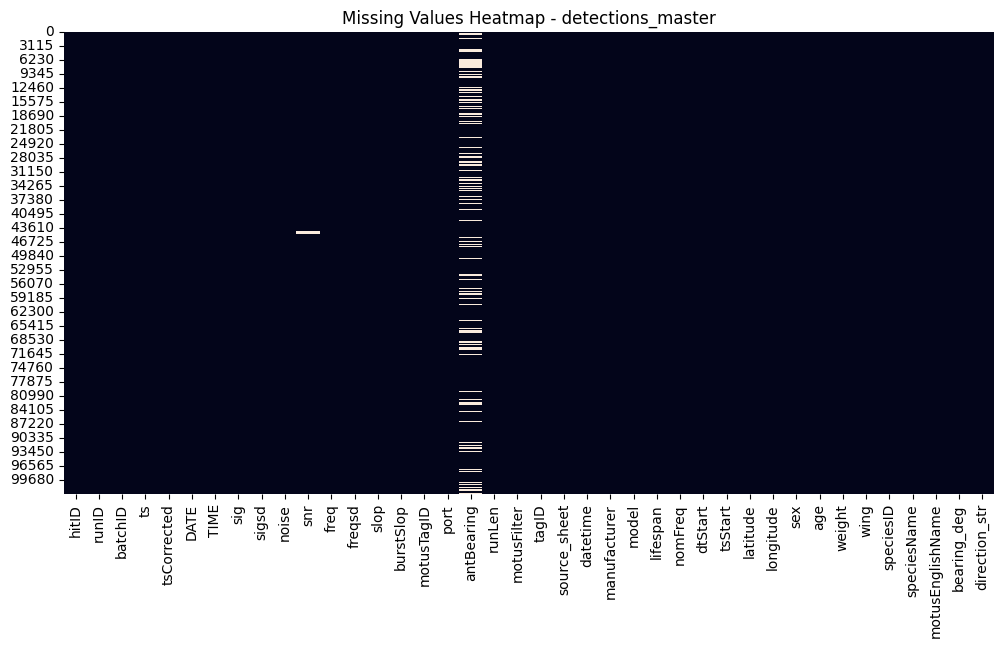

,hitID,runID,batchID,ts,tsCorrected,DATE,TIME,sig,sigsd,noise,...,datetime,lifespan,nomFreq,tsStart,latitude,longitude,weight,wing,speciesID,bearing_deg
count,1.027760e+05,1.027760e+05,1.027760e+05,1.027760e+05,1.027760e+05,102776,102776,102776.000000,102776.000000,102776.000000,...,102776,102776.0,1.027760e+05,1.027760e+05,1.027760e+05,1.027760e+05,102776.000000,102776.000000,102776.0,102776.000000
mean,2.604055e+10,6.916985e+08,1.468637e+07,1.696314e+09,1.696314e+09,2023-10-03 00:17:09.225217024,2023-10-03 00:17:09.225217024,-58.376202,9.178395,-78.186803,...,2023-10-03 06:17:09.225166592,1111.0,1.663800e+02,1.696162e+09,5.338060e+01,-1.125273e+02,89.371918,139.584426,7680.0,111.225335
min,2.472886e+10,6.553619e+08,1.370274e+07,1.694927e+09,1.694927e+09,2023-09-16 23:06:58.385000,2023-09-16 23:06:58.385000,-77.303400,0.000000,-85.721000,...,2023-09-17 05:06:58.385099888,1111.0,1.663800e+02,1.694905e+09,5.338060e+01,-1.125273e+02,73.300000,128.000000,7680.0,-10.000000
25%,2.644425e+10,7.028816e+08,1.498913e+07,1.695700e+09,1.695700e+09,2023-09-25 21:39:07.331000064,2023-09-25 21:39:07.331000064,-68.721525,2.183575,-81.081625,...,2023-09-26 03:39:07.331300096,1111.0,1.663800e+02,1.695614e+09,5.338060e+01,-1.125273e+02,87.200000,136.000000,7680.0,0.000000
50%,2.644427e+10,7.028825e+08,1.498913e+07,1.696099e+09,1.696099e+09,2023-09-30 12:33:39.028999936,2023-09-30 12:33:39.028999936,-61.545150,5.116700,-80.153450,...,2023-09-30 18:33:39.028699904,1111.0,1.663800e+02,1.695871e+09,5.338060e+01,-1.125273e+02,88.600000,140.000000,7680.0,135.000000
75%,2.644430e+10,7.028833e+08,1.498913e+07,1.696656e+09,1.696656e+09,2023-10-06 23:28:18.668999936,2023-10-06 23:28:18.668999936,-48.864125,10.378175,-77.785600,...,2023-10-07 05:28:18.669125120,1111.0,1.663800e+02,1.696565e+09,5.338060e+01,-1.125273e+02,95.000000,143.000000,7680.0,215.000000
max,2.644433e+10,7.028846e+08,1.498913e+07,1.703910e+09,1.703910e+09,2023-12-29 22:13:10.848000,2023-12-29 22:13:10.848000,-16.917400,127.340000,-46.939300,...,2023-12-30 04:13:10.848200083,1111.0,1.663800e+02,1.697614e+09,5.338060e+01,-1.125273e+02,102.700000,147.000000,7680.0,215.000000
std,7.277169e+08,2.015947e+07,5.457184e+05,9.071744e+05,9.071744e+05,NaN,NaN,11.986901,12.079666,5.140335,...,NaN,0.0,1.136874e-13,6.509342e+05,2.842185e-14,1.421092e-14,6.628951,4.747538,0.0,92.503780


In [39]:
# Dataset shape
print("Rows:", detections_master.shape[0])
print("Columns:", detections_master.shape[1])

# Data types
print("\nColumn Types:")
display(detections_master.dtypes)

# Missing values summary
print("\nMissing Values:")
display(detections_master.isna().sum())

# Visual missing values heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(detections_master.isna(), cbar=False)
plt.title("Missing Values Heatmap - detections_master")
plt.show()

# Quick numerical summary
detections_master.describe()


## 📊 9.2 — Categorical Feature Analysis

In this section, we analyze categorical variables to understand overall patterns in the owl detection dataset.  
This helps us check for:
- distribution of antenna ports,
- which directions receive most detections,
- biological metadata (sex, age),
- tag metadata (manufacturer, model),
- deployment status.

These insights are important before modeling because they reveal bias, imbalance, or structural patterns in the data.


/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/608088917.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="port", palette="viridis")


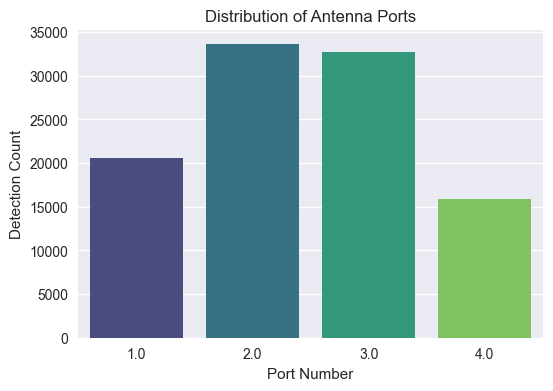

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/608088917.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="direction_str",


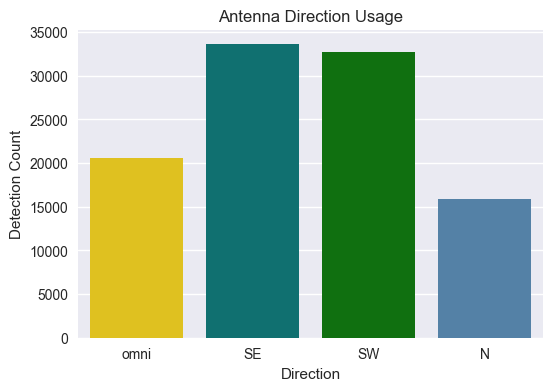

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/608088917.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="motusEnglishName", palette="cubehelix")


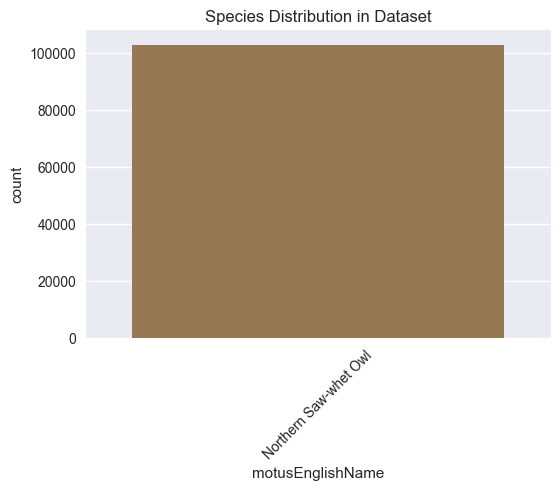

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/608088917.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="sex", palette="Set2")


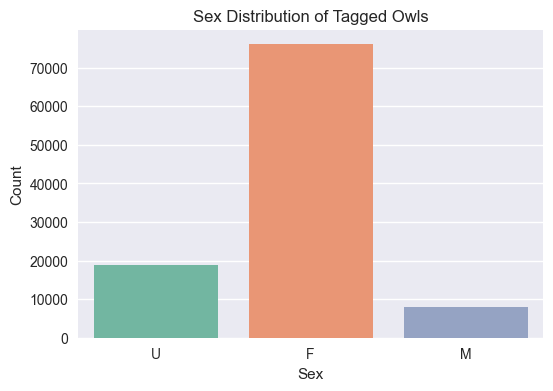

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/608088917.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="age", palette="Set3")


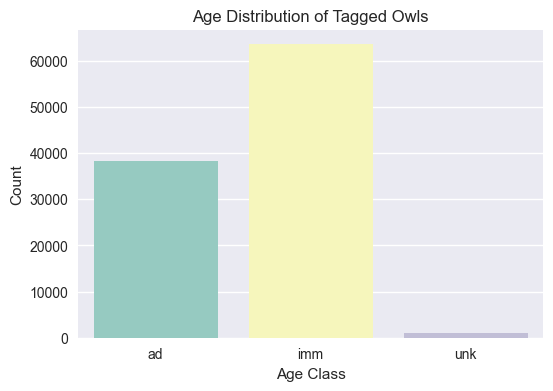

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/608088917.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette="magma")


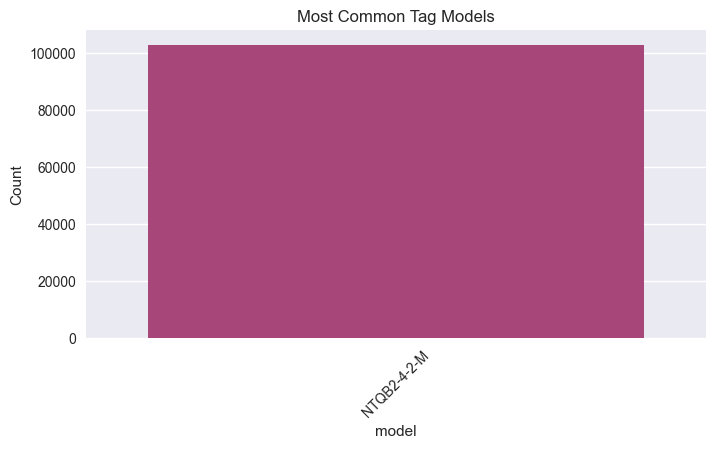

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/608088917.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="manufacturer", palette="coolwarm")


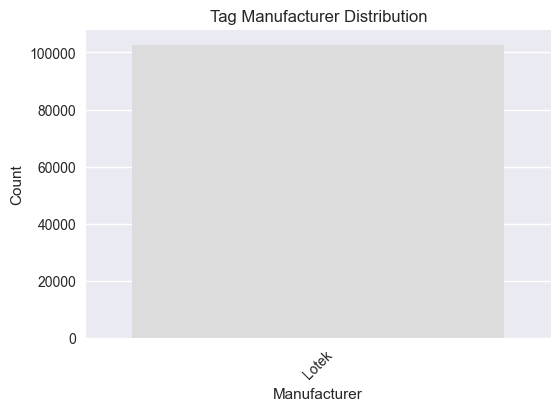

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# ---------- 1. Port Distribution ----------
plt.figure(figsize=(6,4))
sns.countplot(data=detections_master, x="port", palette="viridis")
plt.title("Distribution of Antenna Ports")
plt.xlabel("Port Number")
plt.ylabel("Detection Count")
plt.show()


# ---------- 2. Antenna Direction ----------
plt.figure(figsize=(6,4))
sns.countplot(data=detections_master, x="direction_str",
              order=["omni", "SE", "SW", "N"],
              palette=["gold","teal","green","steelblue"])
plt.title("Antenna Direction Usage")
plt.xlabel("Direction")
plt.ylabel("Detection Count")
plt.show()


# ---------- 3. Species Check ----------
plt.figure(figsize=(6,4))
sns.countplot(data=detections_master, x="motusEnglishName", palette="cubehelix")
plt.title("Species Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()


# ---------- 4. Sex Distribution ----------
plt.figure(figsize=(6,4))
sns.countplot(data=detections_master, x="sex", palette="Set2")
plt.title("Sex Distribution of Tagged Owls")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


# ---------- 5. Age Distribution ----------
plt.figure(figsize=(6,4))
sns.countplot(data=detections_master, x="age", palette="Set3")
plt.title("Age Distribution of Tagged Owls")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.show()


# ---------- 6. Tag Model ----------
plt.figure(figsize=(8,4))
top_models = detections_master["model"].value_counts().head(10)
sns.barplot(x=top_models.index, y=top_models.values, palette="magma")
plt.title("Most Common Tag Models")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


# ---------- 7. Tag Manufacturer ----------
plt.figure(figsize=(6,4))
sns.countplot(data=detections_master, x="manufacturer", palette="coolwarm")
plt.title("Tag Manufacturer Distribution")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 📡 9.3 — Signal Quality Analysis (SNR, Signal, Noise)

Signal quality affects detection reliability and influences how long tagged owls remain detectable.  
In this section, we analyze:

- **Signal strength (sig)**  
- **Noise level (noise)**  
- **Signal-to-noise ratio (snr)**  

These metrics help understand:
- when detections were strong or weak,
- whether weak signals correspond to movement or distance,
- whether noise spikes correspond to reduced detection accuracy,
- whether different antenna directions produce different SNR patterns.

Missing SNR values are expected because the Lotek receiver does not compute SNR for every burst; therefore, SNR is not imputed.


### 1. Distribution of signal, noise, snr

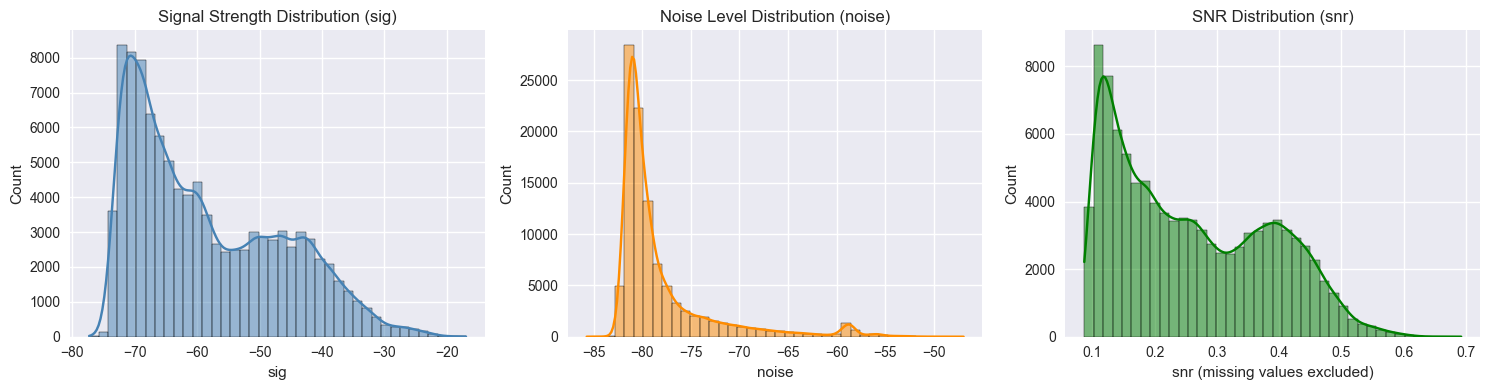

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(detections_master["sig"], bins=40, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Signal Strength Distribution (sig)")

sns.histplot(detections_master["noise"], bins=40, kde=True, ax=axes[1], color="darkorange")
axes[1].set_title("Noise Level Distribution (noise)")

sns.histplot(detections_master["snr"], bins=40, kde=True, ax=axes[2], color="green")
axes[2].set_title("SNR Distribution (snr)")
axes[2].set_xlabel("snr (missing values excluded)")

plt.tight_layout()
plt.show()


### 2.Signal vs Time (Trend analysis)

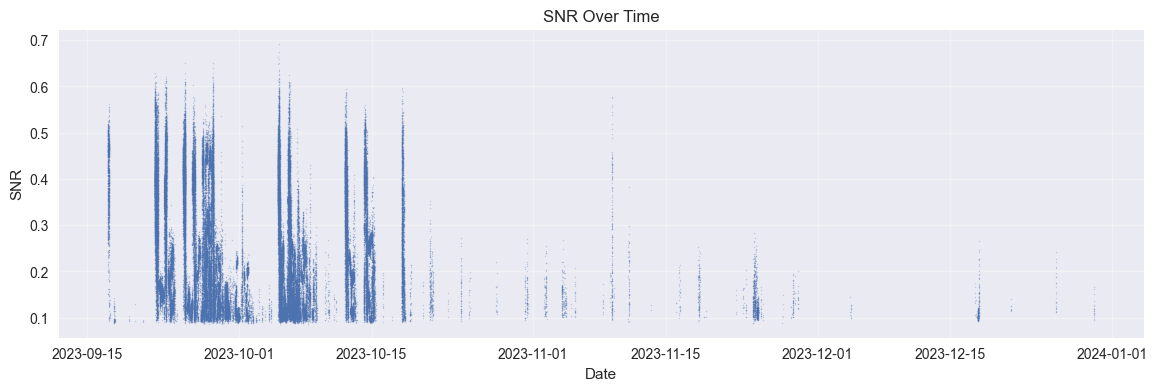

In [42]:
plt.figure(figsize=(14,4))
plt.plot(detections_master["datetime"], detections_master["snr"], ".", markersize=2, alpha=0.3)
plt.title("SNR Over Time")
plt.xlabel("Date")
plt.ylabel("SNR")
plt.grid(alpha=0.3)
plt.show()


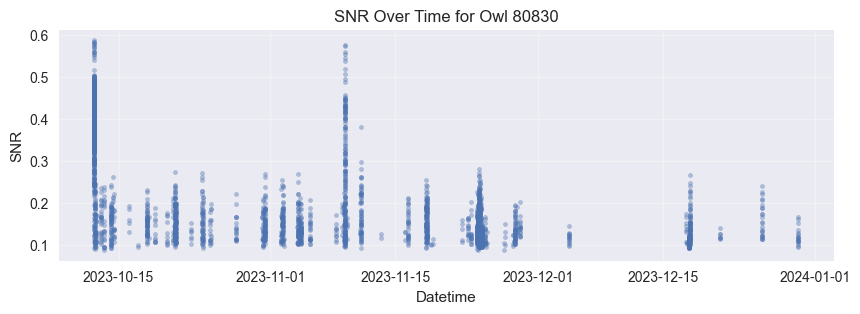

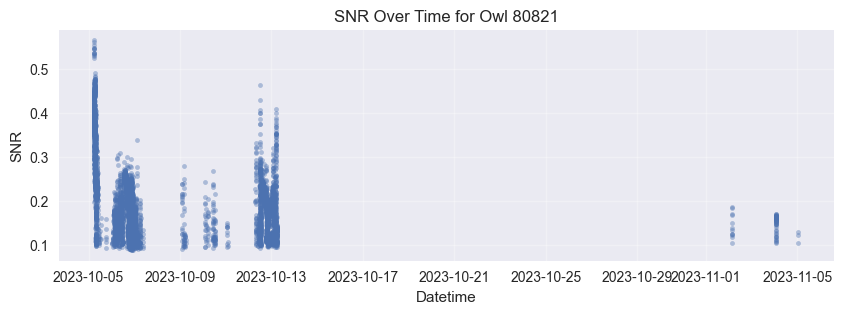

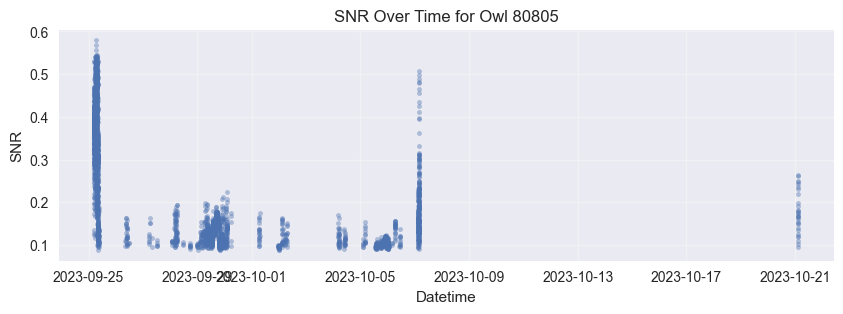

In [43]:
key_tags = [80830, 80821, 80805]

for tag in key_tags:
    df_tag = detections_master[detections_master["tagID"] == tag]
    plt.figure(figsize=(10,3))
    plt.plot(df_tag["datetime"], df_tag["snr"], ".", alpha=0.4)
    plt.title(f"SNR Over Time for Owl {tag}")
    plt.xlabel("Datetime")
    plt.ylabel("SNR")
    plt.grid(alpha=0.3)
    plt.show()


<Axes: xlabel='datetime', ylabel='snr'>

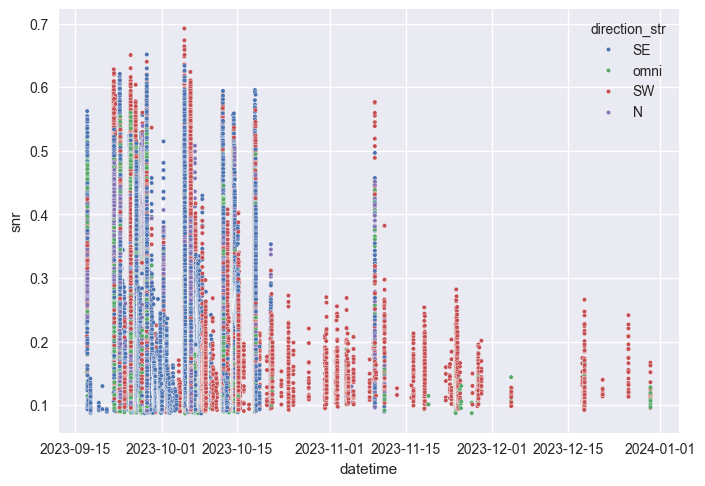

In [44]:
sns.scatterplot(data=detections_master, 
                x="datetime", y="snr", hue="direction_str", s=10)


### 3.Signal Quality by Antenna Direction

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/3077428321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=detections_master, x="direction_str", y="snr",


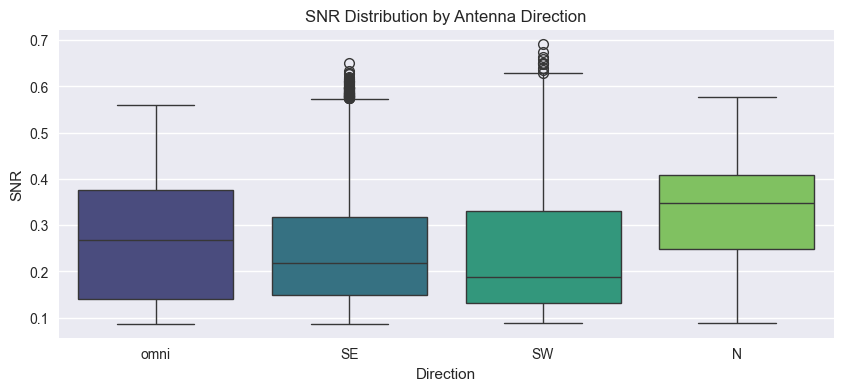

In [45]:
plt.figure(figsize=(10,4))
sns.boxplot(data=detections_master, x="direction_str", y="snr",
            order=["omni","SE","SW","N"], palette="viridis")
plt.title("SNR Distribution by Antenna Direction")
plt.xlabel("Direction")
plt.ylabel("SNR")
plt.show()


### 4.SNR Missingness Visualization

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/3058314570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="snr_missing", palette="coolwarm")


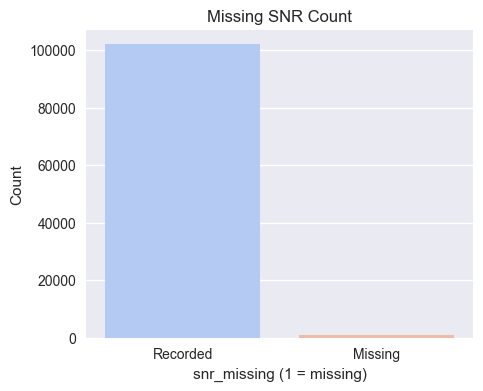

In [46]:
detections_master["snr_missing"] = detections_master["snr"].isna().astype(int)

plt.figure(figsize=(5,4))
sns.countplot(data=detections_master, x="snr_missing", palette="coolwarm")
plt.title("Missing SNR Count")
plt.xlabel("snr_missing (1 = missing)")
plt.ylabel("Count")
plt.xticks([0,1], ["Recorded", "Missing"])
plt.show()


## 🦉 9.4 — Movement Behavior Analysis

Movement behavior is central to the BBO migration project.  
In this section, we analyze:

### ✔ Movement categories
- One-night passage
- Short-stay migrants
- Extended stopovers
- Multi-day owls
- Long-stay owls

### ✔ Direction transitions  
Examines how often an owl moves between directions (SE → SW → N, etc.).

### ✔ Dominant movement direction  
Where the owl was detected most often (suggests movement preference).

### ✔ Behavioral profiles of key owls  
(80830, 80821, 80805 — identified by the instructor)

These insights allow us to understand how owls use the landscape and how they move relative to the antenna tower.


### Movement Category Distribution

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/857211919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movement_summary_df, x="movement_category",


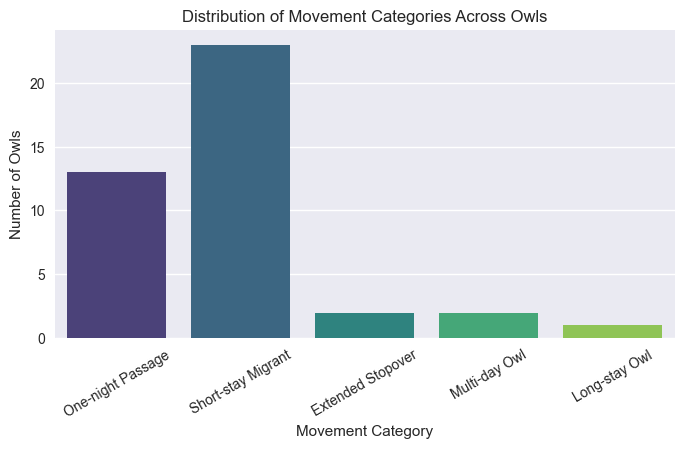

In [47]:
plt.figure(figsize=(8,4))
sns.countplot(data=movement_summary_df, x="movement_category",
              order=["One-night Passage","Short-stay Migrant","Extended Stopover",
                     "Multi-day Owl","Long-stay Owl"],
              palette="viridis")
plt.title("Distribution of Movement Categories Across Owls")
plt.xlabel("Movement Category")
plt.ylabel("Number of Owls")
plt.xticks(rotation=30)
plt.show()


### Movement Category Distribution

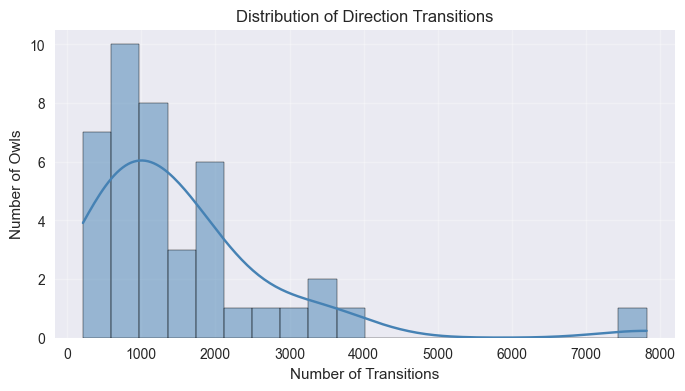

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(movement_summary_df["direction_transitions"], bins=20, kde=True, color="steelblue")
plt.title("Distribution of Direction Transitions")
plt.xlabel("Number of Transitions")
plt.ylabel("Number of Owls")
plt.grid(alpha=0.3)
plt.show()


### Dominant Direction Distribution

/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/1583978341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movement_summary_df, x="dominant_direction",


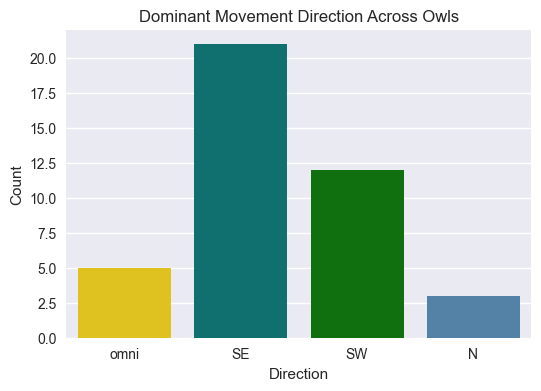

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=movement_summary_df, x="dominant_direction",
              order=["omni","SE","SW","N"],
              palette=["gold","teal","green","steelblue"])
plt.title("Dominant Movement Direction Across Owls")
plt.xlabel("Direction")
plt.ylabel("Count")
plt.show()


### Direction Percentages (Stacked Bar for Key Owls)

<Figure size 1000x500 with 0 Axes>

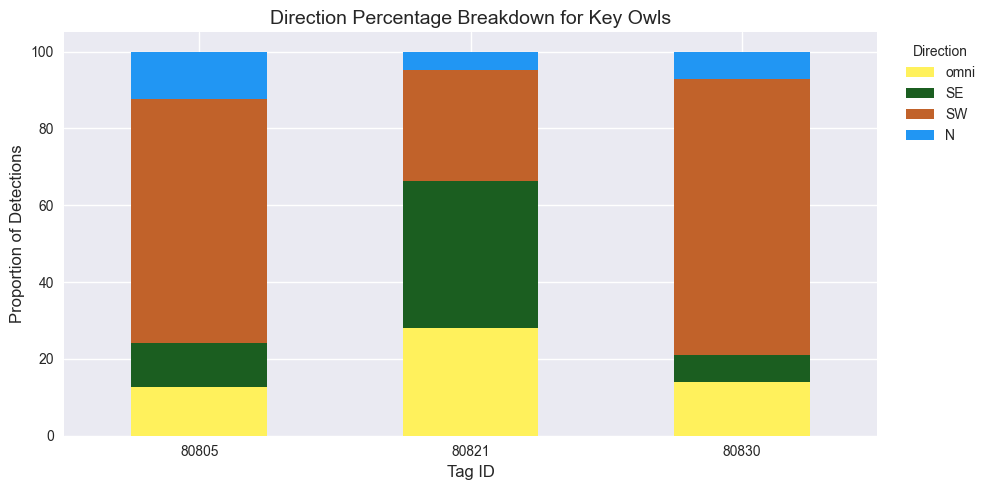

In [50]:
key_owls = [80830, 80821, 80805]

key_df = movement_summary_df[movement_summary_df["tagID"].isin(key_owls)]
key_df = key_df.set_index("tagID")[["pct_omni","pct_SE","pct_SW","pct_N"]]

plt.figure(figsize=(10,5))

# Apply your custom exact colors (in correct order)
colors = [
    "#FFF15C",  # omni
    "#1B5E20",  # SE
    "#C1622A",  # SW
    "#2196F3"   # N
]

key_df.plot(kind="bar", stacked=True, figsize=(10,5), color=colors, edgecolor="none")

plt.title("Direction Percentage Breakdown for Key Owls", fontsize=14)
plt.ylabel("Proportion of Detections", fontsize=12)
plt.xlabel("Tag ID", fontsize=12)
plt.xticks(rotation=0)

# Clean legend (outside plot, no borders)
plt.legend(
    ["omni", "SE", "SW", "N"],
    title="Direction",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

plt.tight_layout()
plt.show()


### 📅 Distribution of Detection Days per Owl


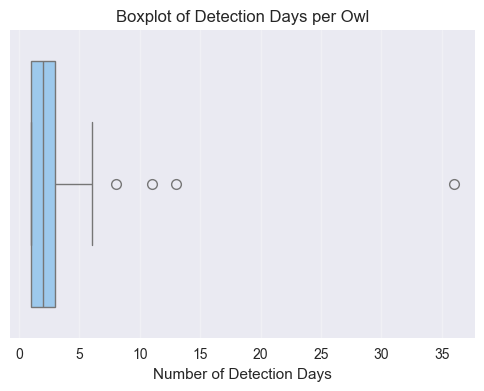

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(x=movement_summary_df["detection_days"], color="#90CAF9")
plt.title("Boxplot of Detection Days per Owl")
plt.xlabel("Number of Detection Days")
plt.grid(axis="x", alpha=0.3)
plt.show()


### 🔄 Days Active vs Direction Transitions
This plot shows whether owls that stayed longer around the tower also showed more directional movement.


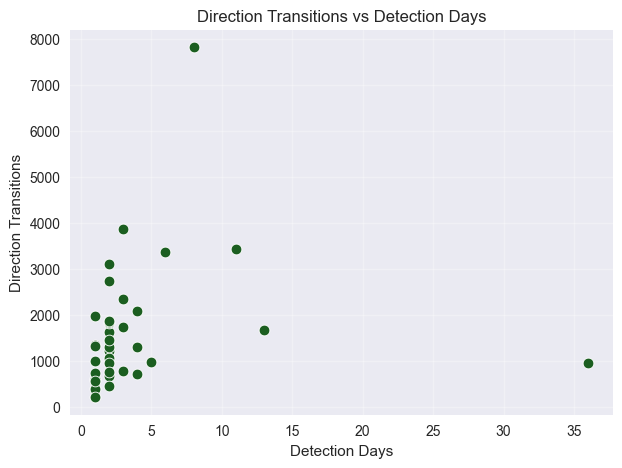

In [52]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=movement_summary_df,
    x="detection_days",
    y="direction_transitions",
    s=60,
    color="#1B5E20"  # dark green, matches SE color theme
)
plt.title("Direction Transitions vs Detection Days")
plt.xlabel("Detection Days")
plt.ylabel("Direction Transitions")
plt.grid(alpha=0.3)
plt.show()


### 📊 Distribution of Direction Transitions Across Owls
Direction transitions represent how frequently an owl switches between antenna quadrants.
High transition counts suggest active movement around the station.


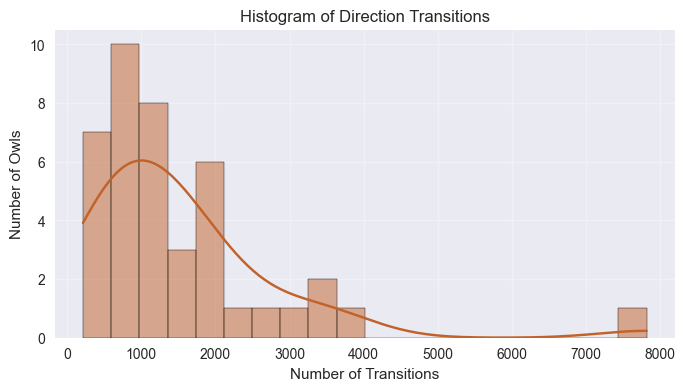

In [53]:
plt.figure(figsize=(8,4))
sns.histplot(
    movement_summary_df["direction_transitions"],
    bins=20,
    kde=True,
    color="#C1622A"  # SW color (burnt orange)
)
plt.title("Histogram of Direction Transitions")
plt.xlabel("Number of Transitions")
plt.ylabel("Number of Owls")
plt.grid(alpha=0.3)
plt.show()


### Movement Path (Text Summary Table)

In [54]:
movement_summary_df[["tagID","unique_directions","direction_transitions",
                     "dominant_direction","movement_category"]]


,tagID,unique_directions,direction_transitions,dominant_direction,movement_category
0,80795,"[SE, omni, SW, N]",2080,omni,Short-stay Migrant
1,80796,"[omni, SW, N, SE]",3867,omni,Short-stay Migrant
2,80798,"[omni, SW, SE, N]",988,SE,Short-stay Migrant
3,80800,"[SW, omni, SE, N]",740,omni,Short-stay Migrant
4,80801,"[SW, omni, SE, N]",2740,SE,Short-stay Migrant
5,80802,"[SW, omni, SE, N]",1636,SE,Short-stay Migrant
6,80803,"[SW, omni, SE, N]",1989,N,One-night Passage
7,80804,"[SW, N, SE, omni]",1348,SW,One-night Passage
8,80805,"[omni, SE, N, SW]",1684,SW,Multi-day Owl
9,80806,"[omni, SE, SW, N]",685,SW,Short-stay Migrant


### Key Owl Movement Profiles (Instructor Owls)

In [55]:
movement_summary_df[
    movement_summary_df["tagID"].isin([80830,80821,80805])
][[
    "tagID","detection_days","direction_transitions","dominant_direction",
    "movement_category","unique_directions","summary"
]]


,tagID,detection_days,direction_transitions,dominant_direction,movement_category,unique_directions,summary
8,80805,13,1684,SW,Multi-day Owl,"[omni, SE, N, SW]",Tag 80805 detected on 13 days with 1684 moveme...
23,80821,11,3442,SE,Multi-day Owl,"[SE, omni, N, SW]",Tag 80821 detected on 11 days with 3442 moveme...
31,80830,36,954,SW,Long-stay Owl,"[SE, omni, SW, N]",Tag 80830 detected on 36 days with 954 movemen...


In [56]:
direction_colors = {
    "omni": "#FFF15C",   # light yellow
    "SE": "#1B5E20",     # deep green
    "SW": "#C1622A",     # burnt orange
    "N": "#2196F3"       # blue
}


## 🔥 9.5 — Correlation Heatmap

A correlation heatmap helps identify relationships between continuous numerical features.  
This is useful for:

- understanding what factors affect signal strength or SNR,  
- validating assumptions before modeling,  
- detecting multicollinearity between features.

Only numeric columns are included to avoid noise from categorical values.


In [57]:
# Select numeric columns only
numeric_df = detections_master.select_dtypes(include=["float64", "int64"])

# Drop columns with all NaN or no variance
numeric_df = numeric_df.dropna(axis=1, how="all")
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

numeric_df.head()


,hitID,runID,batchID,ts,tsCorrected,sig,sigsd,noise,snr,freq,...,port,antBearing,runLen,motusFilter,tagID,tsStart,weight,wing,bearing_deg,snr_missing
0,2.472887e+10,655361920.0,13702736.0,1.695353e+09,1.695353e+09,-51.1996,4.2392,-80.0692,0.360558,3.9015,...,2.0,215.0,338.0,1.0,80795,1695353400,86.0,138.0,215,0
1,2.472887e+10,655361923.0,13702736.0,1.695353e+09,1.695353e+09,-39.3644,1.9325,-72.4576,0.456725,3.8782,...,1.0,NaN,494.0,1.0,80795,1695353400,86.0,138.0,-10,0
2,2.472887e+10,655361921.0,13702736.0,1.695353e+09,1.695353e+09,-47.9458,7.5529,-77.5016,0.381357,3.8843,...,3.0,135.0,342.0,1.0,80795,1695353400,86.0,138.0,135,0
3,2.472887e+10,655361922.0,13702736.0,1.695353e+09,1.695353e+09,-43.1765,2.4676,-74.9885,0.424225,3.9133,...,4.0,0.0,526.0,1.0,80795,1695353400,86.0,138.0,0,0
4,2.472887e+10,655361923.0,13702736.0,1.695353e+09,1.695353e+09,-41.6397,1.3105,-74.5216,0.441240,3.8792,...,1.0,NaN,494.0,1.0,80795,1695353400,86.0,138.0,-10,0


### 🔥 Correlation Heatmap of Numerical Variables


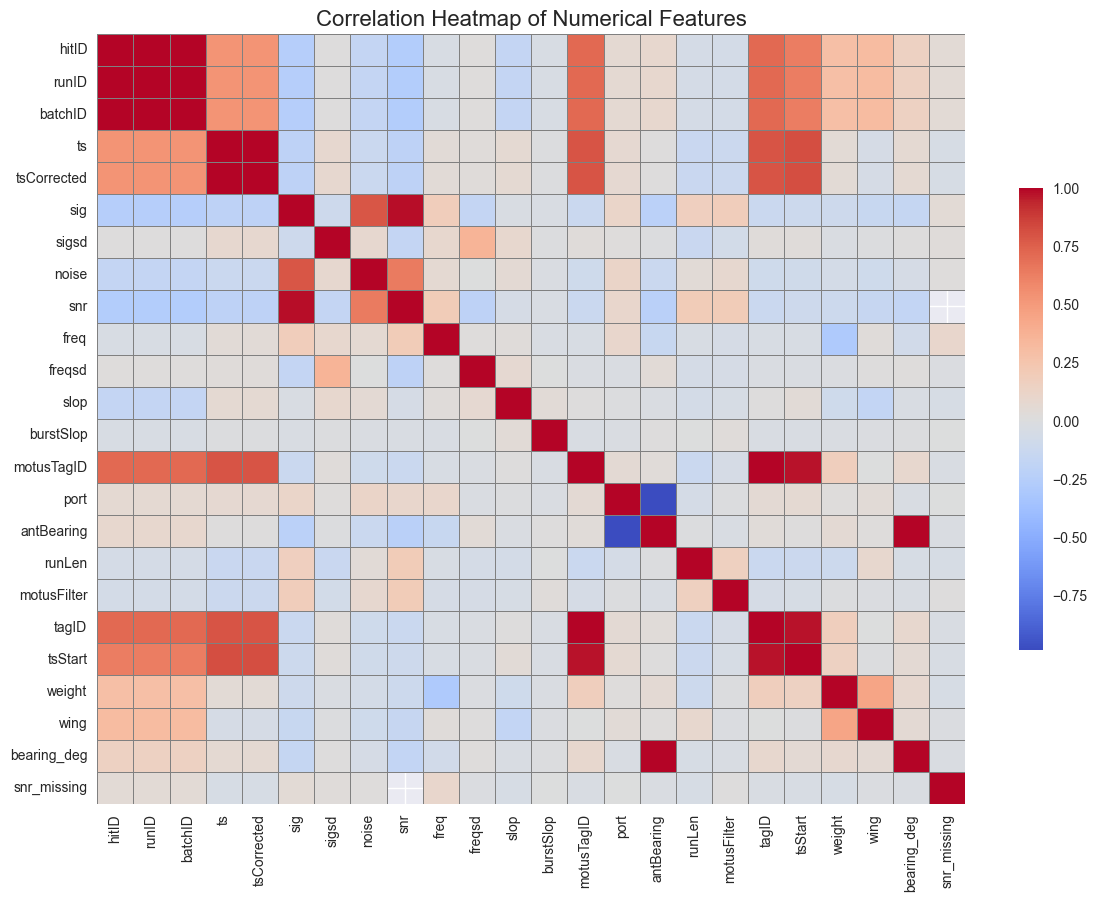

In [58]:
plt.figure(figsize=(14,10))
sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    annot=False,
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"shrink": 0.6}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


## 🌙 9.7 — Daily & Hourly Migration Patterns

Saw-whet owls are strongly nocturnal migrants.  
To verify this in our dataset, we examine:

- **Hourly detection patterns**  
- **Daily detection counts throughout the study period**  
- **Weekday vs Weekend behavior**  
- **Seasonal (monthly) detection patterns**

These analyses help us understand activity cycles and migration wave timing.


In [59]:
detections_master["hour"] = detections_master["datetime"].dt.hour
detections_master["date"] = detections_master["datetime"].dt.date
detections_master["day"] = detections_master["datetime"].dt.day
detections_master["month"] = detections_master["datetime"].dt.month
detections_master["weekday"] = detections_master["datetime"].dt.day_name()


### 🌙 9.7.1 — Hourly Detection Pattern
Owls are primarily nocturnal.  
This plot shows the distribution of detections across the 24 hours of the day.


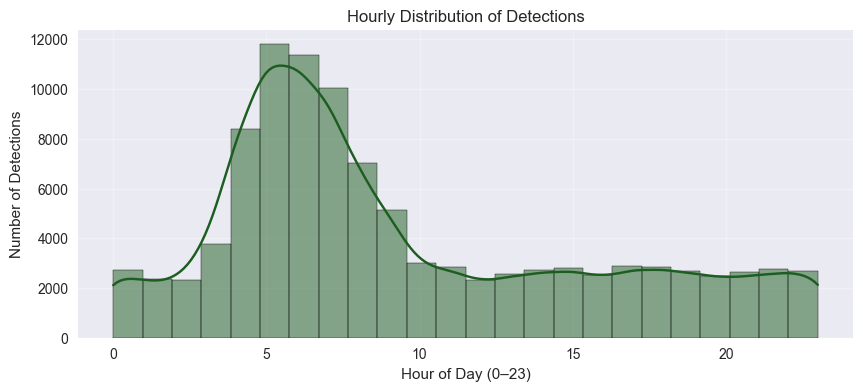

In [60]:
plt.figure(figsize=(10,4))
sns.histplot(
    data=detections_master,
    x="hour",
    bins=24,
    color="#1B5E20",   # dark green (SE color)
    kde=True
)
plt.title("Hourly Distribution of Detections")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Detections")
plt.grid(alpha=0.3)
plt.show()


### 📅 9.7.2 — Daily Detection Counts
This shows how migration activity changes across days.  
Peaks correspond to major nights of movement.


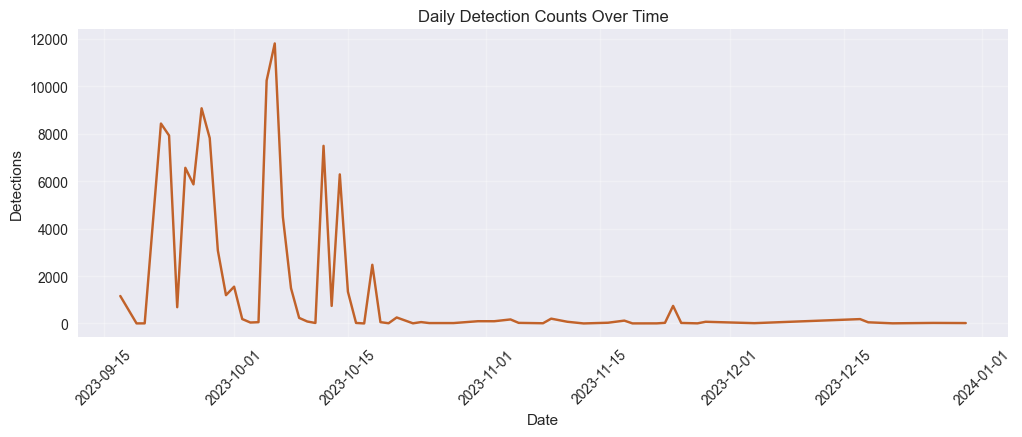

In [61]:
daily_counts = detections_master.groupby("date").size()

plt.figure(figsize=(12,4))
plt.plot(daily_counts.index, daily_counts.values, color="#C1622A")  # burnt orange
plt.title("Daily Detection Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Detections")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()


### 📆 9.7.3 — Weekday vs Weekend Detections
This checks whether activity differs between weekdays and weekends.


/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/3616446042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="weekday", order=[


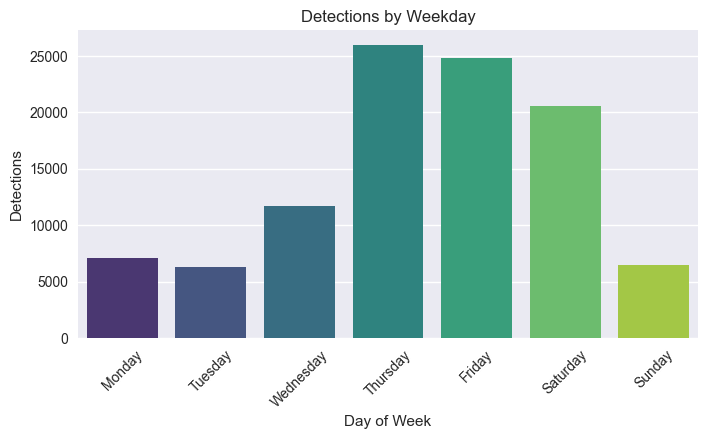

In [62]:
plt.figure(figsize=(8,4))
sns.countplot(data=detections_master, x="weekday", order=[
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
], palette="viridis")
plt.title("Detections by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Detections")
plt.xticks(rotation=45)
plt.show()


### 🍂 9.7.4 — Monthly Detection Pattern
Shows which months have the highest migration intensity.


/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/1118811032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=detections_master, x="month", palette="coolwarm")


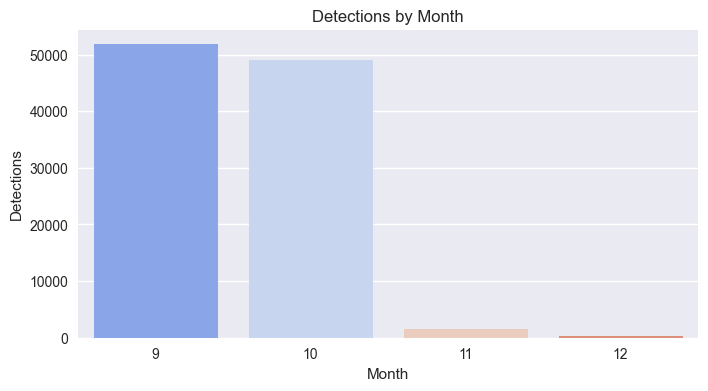

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(data=detections_master, x="month", palette="coolwarm")
plt.title("Detections by Month")
plt.xlabel("Month")
plt.ylabel("Detections")
plt.show()


### ⏱ 9.7.5 — Hourly Activity for Key Owls
These plots show when each owl was active around the tower.


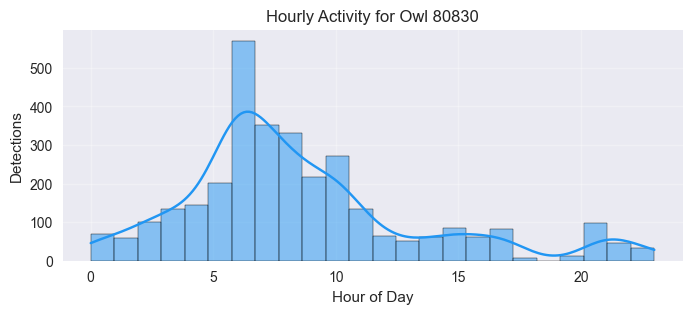

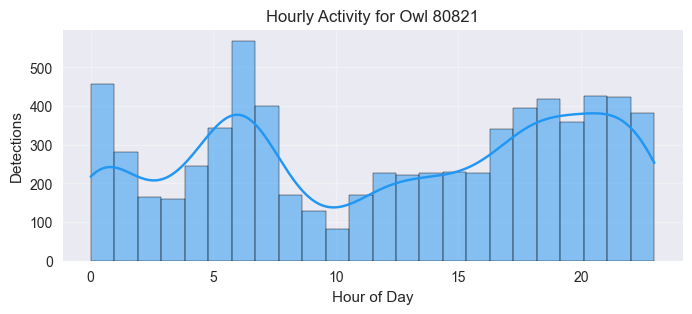

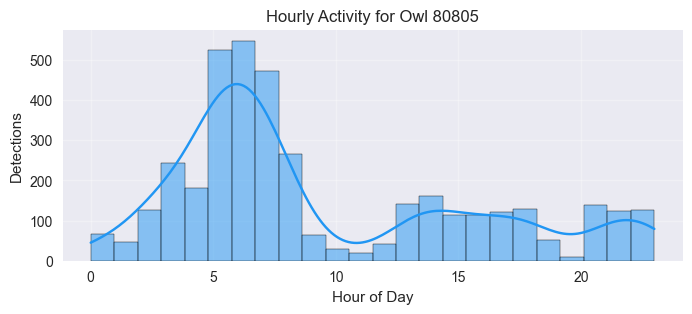

In [64]:
key_tags = [80830, 80821, 80805]

for tag in key_tags:
    df_tag = detections_master[detections_master["tagID"] == tag]
    
    plt.figure(figsize=(8,3))
    sns.histplot(df_tag["hour"], bins=24, kde=True, color="#2196F3")  # blue (N color)
    plt.title(f"Hourly Activity for Owl {tag}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Detections")
    plt.grid(alpha=0.3)
    plt.show()


## 🧭 9.8 — Full Direction Timeline for All Owls

This plot shows how detection direction (SE, SW, N, Omni) changes across time for every tagged owl.
It helps visualize:
- when owls appeared at the tower,
- how long each owl stayed,
- which directions were most common during each visit,
- periods of high migration intensity.


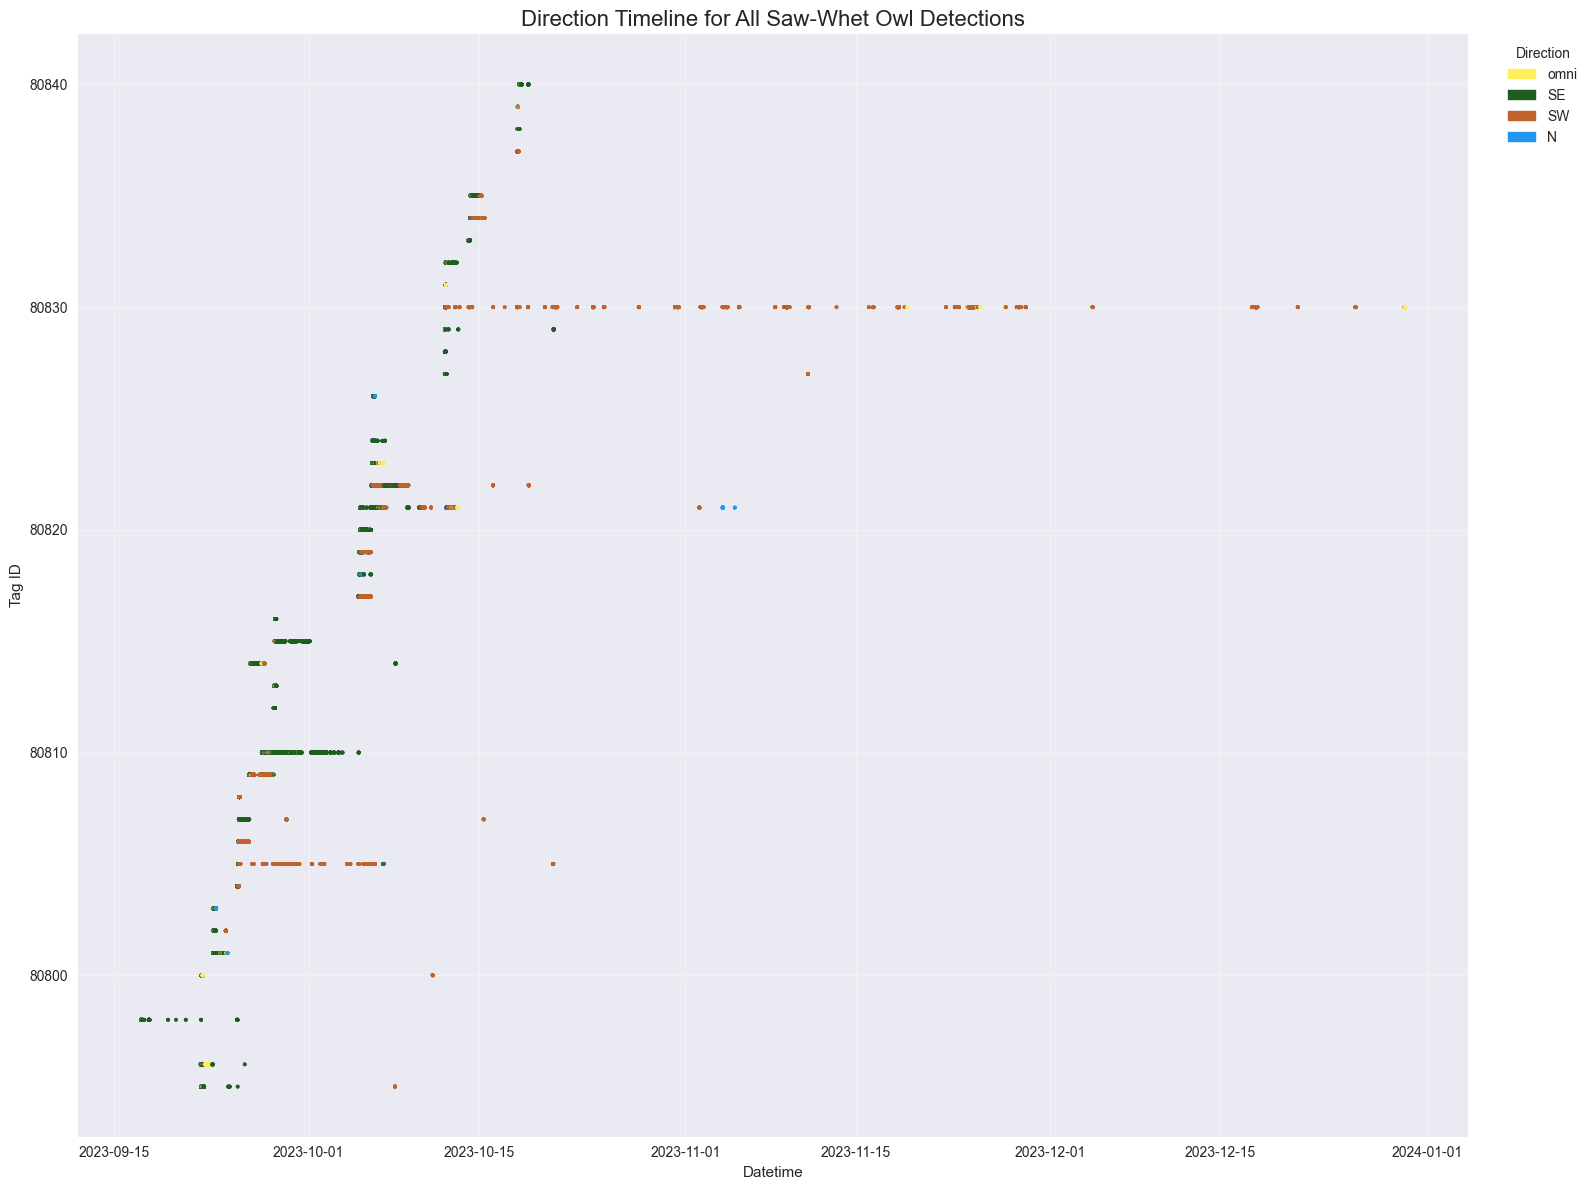

In [65]:
# Use your custom colors
direction_colors = {
    "omni": "#FFF15C",   # light yellow
    "SE": "#1B5E20",     # green
    "SW": "#C1622A",     # burnt orange
    "N": "#2196F3"       # blue
}

plt.figure(figsize=(16,12))

# Sort by tagID for clean grouping
for tag in sorted(detections_master["tagID"].unique()):
    df_tag = detections_master[detections_master["tagID"] == tag]
    plt.scatter(
        df_tag["datetime"],
        [tag] * len(df_tag),
        c=df_tag["direction_str"].map(direction_colors),
        s=6,
        alpha=0.8
    )

plt.title("Direction Timeline for All Saw-Whet Owl Detections", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Tag ID")
plt.grid(alpha=0.3)

# legend
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=direction)
                  for direction, color in direction_colors.items()]
plt.legend(handles=legend_patches, title="Direction", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 📡 9.9 — Detection Distribution by Antenna Port

This section visualizes how detections are distributed across the four antenna ports:
- Port 1 → Omni  
- Port 2 → Southwest  
- Port 3 → Southeast  
- Port 4 → North  

This helps identify which direction owls most frequently arrived from.


/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_11705/3554822421.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


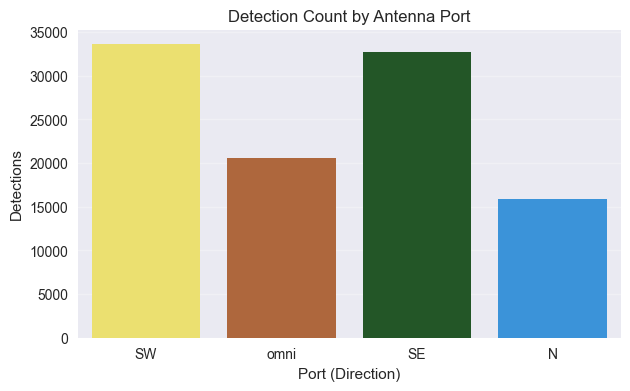

In [66]:
port_names = {1: "omni", 2: "SW", 3: "SE", 4: "N"}

detections_master["port_name"] = detections_master["port"].map(port_names)

plt.figure(figsize=(7,4))
sns.countplot(
    data=detections_master,
    x="port_name",
    palette=[direction_colors.get(x) for x in ["omni","SW","SE","N"]]
)

plt.title("Detection Count by Antenna Port")
plt.xlabel("Port (Direction)")
plt.ylabel("Detections")
plt.grid(axis="y", alpha=0.3)
plt.show()


## 🗺 9.10 — Location & Spatial Visualization

Although detections originate from a single fixed Motus receiver tower, spatial information is still valuable.

This visualization shows:
- the location of the receiver,
- directional orientation of each antenna,
- how signal directions relate to real-world geography.


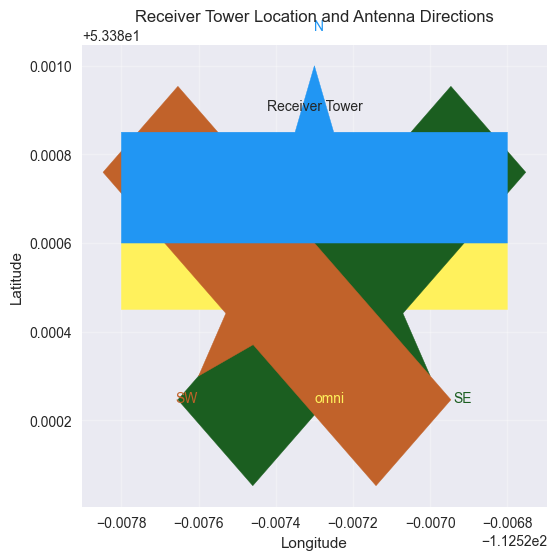

In [67]:
lat = detections_master["latitude"].iloc[0]
lon = detections_master["longitude"].iloc[0]

plt.figure(figsize=(6,6))
plt.scatter(lon, lat, s=200, color="black")
plt.text(lon, lat+0.0003, "Receiver Tower", ha="center")

# Draw arrows for 4 ports
arrows = {
    "omni": (0, -0.0003),
    "SE": (0.0003, -0.0003),
    "SW": (-0.0003, -0.0003),
    "N": (0, 0.0004)
}

for direction, (dx, dy) in arrows.items():
    plt.arrow(lon, lat, dx, dy, color=direction_colors[direction], 
              head_width=0.0001, length_includes_head=True)
    plt.text(lon + dx*1.2, lat + dy*1.2, direction, color=direction_colors[direction])

plt.title("Receiver Tower Location and Antenna Directions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)
plt.show()


In [68]:
# Convert to datetime
detections_master["datetime"] = pd.to_datetime(detections_master["datetime"], utc=True, errors="coerce")
detections_master["dtStart"] = pd.to_datetime(detections_master["dtStart"], utc=True, errors="coerce")

# Remove timezone info (make tz-naive)
detections_master["datetime"] = detections_master["datetime"].dt.tz_localize(None)
detections_master["dtStart"] = detections_master["dtStart"].dt.tz_localize(None)


# Group by tagID to compute duration
duration_df = detections_master.groupby("tagID").agg(
    dtStart=("dtStart", "first"),
    first_detection=("datetime", "min"),
    last_detection=("datetime", "max"),
    detections_count=("datetime", "count"),   # extra feature
).reset_index()

# Calculate duration in days & hours
duration_df["duration_days"] = (duration_df["last_detection"] - duration_df["dtStart"]).dt.days
duration_df["duration_hours"] = (duration_df["last_detection"] - duration_df["dtStart"]).dt.total_seconds() / 3600


In [69]:
# Extract first biological row per tagID
bio_cols = ["tagID", "sex", "age", "weight", "wing",
            "model", "lifespan", "nomFreq"]

bio_df = detections_master[bio_cols].drop_duplicates(subset="tagID")

# Merge with duration table
duration_merged = duration_df.merge(bio_df, on="tagID", how="left")


In [70]:
# Remove negative durations (if any weirdness)
duration_merged = duration_merged[duration_merged["duration_days"] >= 0]

# Drop missing biological values
duration_merged = duration_merged.dropna(subset=["duration_days"])


In [71]:

duration_merged.head()


,tagID,dtStart,first_detection,last_detection,detections_count,duration_days,duration_hours,sex,age,weight,wing,model,lifespan,nomFreq
0,80795,2023-09-22 03:30:00,2023-09-22 03:29:12.296499968,2023-10-08 02:34:56.999200106,2408,15,383.082500,U,ad,86.0,138.0,NTQB2-4-2-M,1111,166.38
1,80796,2023-09-22 01:30:00,2023-09-22 03:08:45.901499987,2023-09-25 17:54:07.227699995,5550,3,88.402008,F,imm,88.4,140.0,NTQB2-4-2-M,1111,166.38
2,80798,2023-09-16 23:00:00,2023-09-17 05:06:58.385099888,2023-09-25 03:28:53.065000057,1204,8,196.481407,U,imm,84.2,136.0,NTQB2-4-2-M,1111,166.38
3,80800,2023-09-22 03:00:00,2023-09-22 04:27:23.221800089,2023-10-11 05:03:53.091700077,830,19,458.064748,U,imm,82.2,129.0,NTQB2-4-2-M,1111,166.38
4,80801,2023-09-23 04:00:00,2023-09-23 03:59:24.295399904,2023-09-24 07:55:34.963099957,4244,1,27.926379,M,imm,80.9,129.0,NTQB2-4-2-M,1111,166.38


In [72]:
duration_merged.shape

(41, 14)

In [73]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# -----------------------------
# 1. Select features + target
# -----------------------------
features = [
    "sex", "age", "weight", "wing",
    "model", "lifespan", "nomFreq", "detections_count"
]

X = duration_merged[features]
y = duration_merged["duration_days"]

# -----------------------------
# 2. Preprocessing
# -----------------------------
categorical = ["sex", "age", "model"]
numeric = ["weight", "wing", "lifespan", "nomFreq", "detections_count"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# -----------------------------
# 3. Random Forest
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf)
])

# -----------------------------
# 4. 5-Fold Cross-Validation
# -----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error"))

print("Cross-Validation Results (5-Fold):")
print(f"MAE:  {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")

# -----------------------------
# 5. Fit final model
# -----------------------------
model.fit(X, y)

# -----------------------------
# 6. Feature Importance
# -----------------------------
encoded_cols = model.named_steps["preprocess"].transformers_[0][1].get_feature_names_out(categorical)
all_feature_names = list(encoded_cols) + numeric

importances = model.named_steps["rf"].feature_importances_

feature_importance = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance


Cross-Validation Results (5-Fold):
MAE:  11.21 ± 3.62
RMSE: 15.31 ± 6.89


,feature,importance
11,detections_count,0.405457
7,weight,0.260331
8,wing,0.181363
2,sex_U,0.076298
3,age_ad,0.041050
4,age_imm,0.017409
0,sex_F,0.012842
1,sex_M,0.004770
5,age_unk,0.000480
6,model_NTQB2-4-2-M,0.000000


In [74]:
import joblib

# Save the trained model pipeline
joblib.dump(model, "duration_model.joblib")

print("Model saved as duration_model.joblib")


Model saved as duration_model.joblib


# Step 10 - Modlelling

## 🟦 10.2 — Detection Duration Modeling (Regression)

In this section, we build a regression model to estimate **how long an owl remains detectable** after tagging.

### 🎯 Objective  
Predict `detection_days` using biologic, behavioral, and detection features extracted from the dataset.

### 📦 Features used:
- `% of detections in each direction (omni, SE, SW, N)`
- Direction transition count
- Total detections
- Dominant direction (encoded)
- Biological features:  
  - weight  
  - wing length  
  - sex  
  - age  
- Tag metadata:
  - lifespan  
  - nomFreq  
  - model  

We will train multiple regression models and compare their performance:
- Linear Regression  
- Random Forest Regressor  
- Gradient Boosting Regressor  

Evaluation Metrics:
- MAE (Mean Absolute Error)
- RMSE
- R² Score


In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Use movement_summary_df (already built earlier)
df = movement_summary_df.copy()

# Bring biological + tag metadata into the summary
bio_cols = ["sex", "age", "weight", "wing", "lifespan", "nomFreq", "model"]
df = df.merge(
    detections_master.groupby("tagID")[bio_cols].first().reset_index(),
    on="tagID",
    how="left"
)

df.head()


,tagID,unique_directions,direction_transitions,dominant_direction,pct_omni,pct_SE,pct_SW,pct_N,detections,first_detection,...,days_active,movement_category,summary,sex,age,weight,wing,lifespan,nomFreq,model
0,80795,"[SE, omni, SW, N]",2080,omni,27.906977,22.882060,22.965116,26.245847,2408,2023-09-22 03:29:12.296499968,...,16,Short-stay Migrant,Tag 80795 detected on 4 days with 2080 movemen...,U,ad,86.0,138.0,1111,166.38,NTQB2-4-2-M
1,80796,"[omni, SW, N, SE]",3867,omni,46.000000,18.036036,18.468468,17.495495,5550,2023-09-22 03:08:45.901499987,...,4,Short-stay Migrant,Tag 80796 detected on 3 days with 3867 movemen...,F,imm,88.4,140.0,1111,166.38,NTQB2-4-2-M
2,80798,"[omni, SW, SE, N]",988,SE,23.338870,32.225914,22.176080,22.259136,1204,2023-09-17 05:06:58.385099888,...,8,Short-stay Migrant,Tag 80798 detected on 5 days with 988 movement...,U,imm,84.2,136.0,1111,166.38,NTQB2-4-2-M
3,80800,"[SW, omni, SE, N]",740,omni,27.349398,25.783133,20.602410,26.265060,830,2023-09-22 04:27:23.221800089,...,20,Short-stay Migrant,Tag 80800 detected on 2 days with 740 movement...,U,imm,82.2,129.0,1111,166.38,NTQB2-4-2-M
4,80801,"[SW, omni, SE, N]",2740,SE,29.052780,51.979265,9.213007,9.754948,4244,2023-09-23 03:59:24.295399904,...,2,Short-stay Migrant,Tag 80801 detected on 2 days with 2740 movemen...,M,imm,80.9,129.0,1111,166.38,NTQB2-4-2-M


In [76]:
cat_cols = ["dominant_direction", "sex", "age", "model"]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [77]:
# Feature columns
feature_cols = [
    "pct_omni", "pct_SE", "pct_SW", "pct_N",
    "direction_transitions", "detections",
    "dominant_direction", "sex", "age", "weight", "wing",
    "lifespan", "nomFreq"
]

X = df[feature_cols]
y = df["detection_days"]


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

pd.DataFrame(results).T


,MAE,RMSE,R²
Linear Regression,4.848099,6.779650,-2.450125
Random Forest,1.780000,3.363568,0.150779
Gradient Boosting,1.868969,3.536316,0.061309


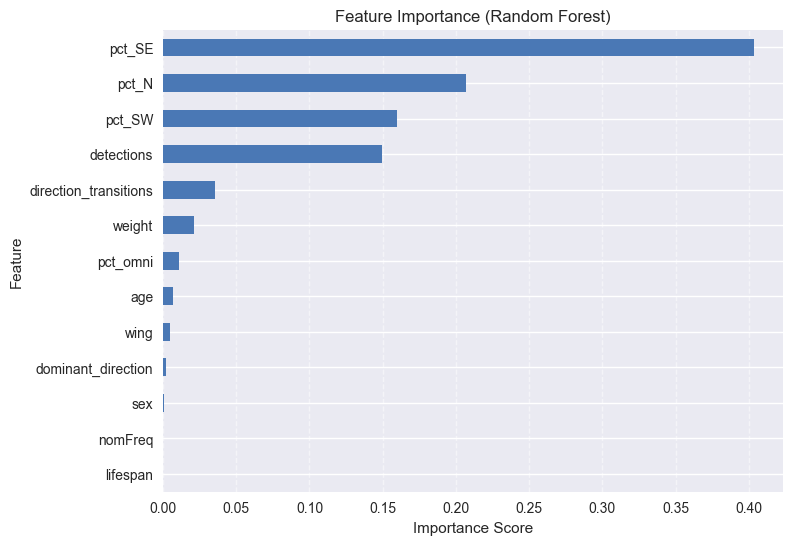

In [81]:
# Refit the Random Forest on the full training data
best_rf = RandomForestRegressor(n_estimators=300, random_state=42)
best_rf.fit(X_train, y_train)

# Extract feature importances
importances = pd.Series(best_rf.feature_importances_, index=feature_cols)

# Plot
plt.figure(figsize=(8, 6))
importances.sort_values().plot(kind="barh", color="#4a78b5")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


pct_SE is the strongest predictor → birds detected mostly from SE stay longer

pct_N and pct_SW also important → directional behavior matters

detections is highly predictive → more activity = longer stay

direction_transitions moderate → frequent switching has some effect

biological traits (age, wing, weight, sex) → very low predictive power

device metadata (lifespan, nomFreq) → almost irrelevant

In [82]:
import joblib

# Save model
joblib.dump(best_rf, "detection_model.joblib")

print("Model saved as detection_model.joblib")


Model saved as detection_model.joblib


In [83]:
# import shap

# # Use the trained Random Forest model
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_train)

# # Summary plot
# shap.summary_plot(shap_values, X_train, plot_type="dot")

# # Optional: bar plot
# shap.summary_plot(shap_values, X_train, plot_type="bar")

# # Example: decision plot for first owl
# shap.decision_plot(explainer.expected_value, shap_values[0], X_train.iloc[0])


### Partial Dependence Plots (PDP)

PDPs help visualize how a feature influences the predicted detection duration while keeping all other features constant.  
These plots show relationships such as:
- Higher percentage of SE direction often increases predicted stay length.
- More detections strongly increases predicted days.


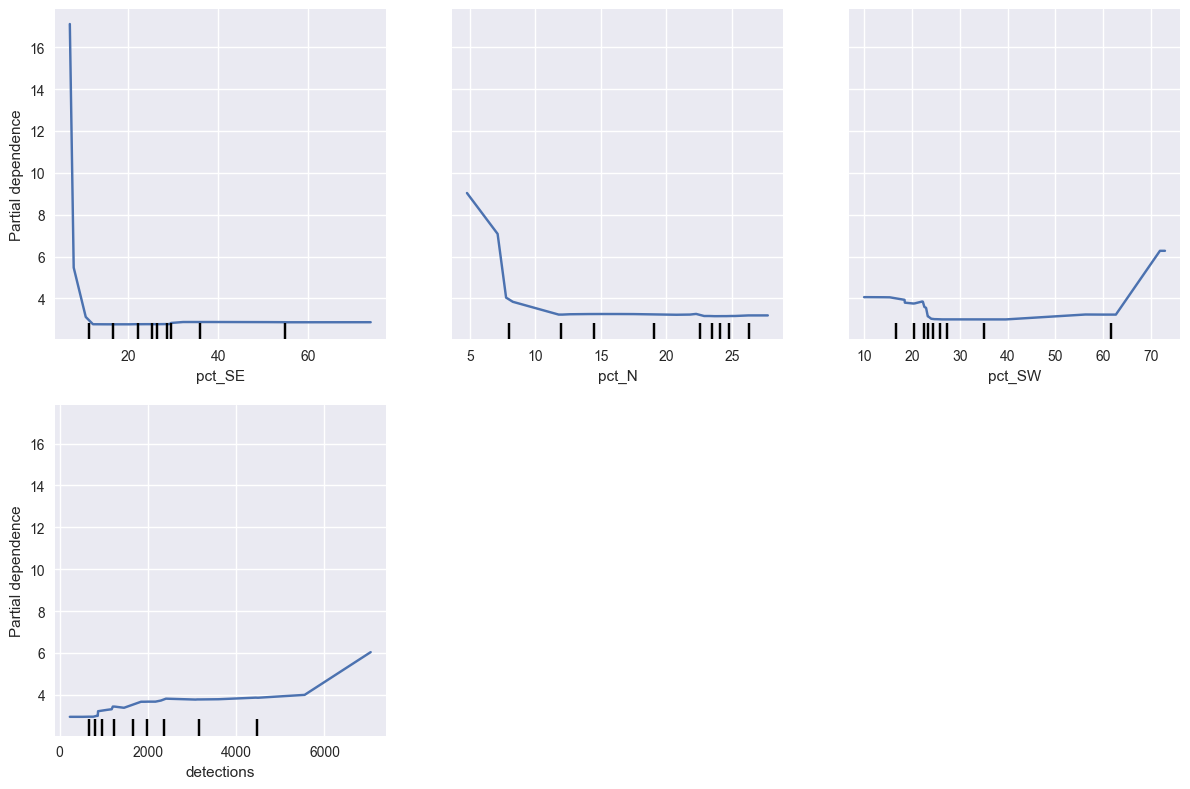

In [84]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = ["pct_SE", "pct_N", "pct_SW", "detections"]

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(best_rf, X_train, features_to_plot, ax=ax)
plt.tight_layout()
plt.show()


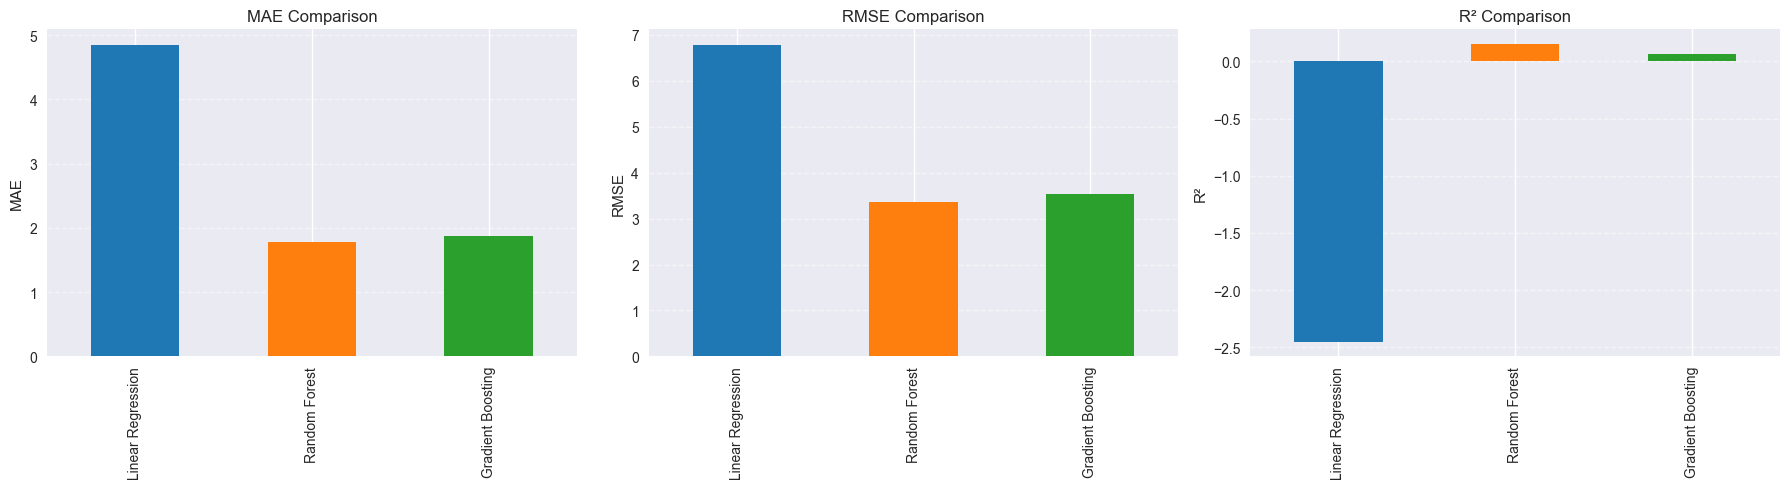

In [85]:
results_df = pd.DataFrame(results).T  # from earlier evaluation block

metrics = ["MAE", "RMSE", "R²"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    results_df[metric].plot(kind='bar', ax=axes[i], color=["#1f77b4", "#ff7f0e", "#2ca02c"])
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylabel(metric)
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# Feature engennering for problems



In [111]:
df = detections_master.copy()

# Ensure datetime is parsed
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df = df.dropna(subset=["datetime"])

# ============================================================
# 1. Antenna angle mapping (MISSING)
# ============================================================

port_angle_map = {
    1: np.nan,   # Omni (no direction)
    2: 215,      # SW
    3: 135,      # SE
    4: 0         # N
}

df["angle"] = df["port"].map(port_angle_map)

# ============================================================
# 2. Previous values (MISSING)
# ============================================================

df = df.sort_values(["tagID", "datetime"])

df["prev_angle"] = df.groupby("tagID")["angle"].shift(1)
df["prev_snr"] = df.groupby("tagID")["snr"].shift(1)

# ============================================================
# 3. Movement transition features (dir_change, snr_spike)
# ============================================================

# direction change between antennas
df["dir_change"] = (df["angle"] != df["prev_angle"]).astype(int)

# SNR spike detection (>10)
df["snr_spike"] = ((df["snr"] - df["prev_snr"]) > 10).astype(int)

# ============================================================
# 4. Night movement indicator (MISSING)
# ============================================================

df["night_move"] = df["hour"].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0)

# ============================================================
# 5. Frequency drift (MISSING)
# ============================================================

df["freq_drift"] = df["freq"] - df["freqsd"]

# ============================================================
# 6. Seasonal feature (MISSING)
# ============================================================

df["dayofyear"] = df["datetime"].dt.dayofyear

# ============================================================
# 7. Final migration label (MISSING)
# ============================================================

df["migration_activity"] = (
    (df["dir_change"] == 1) |
    (df["snr_spike"] == 1) |
    (df["night_move"] == 1)
).astype(int)

print("Engineered columns added successfully.")
print(df[[
    "angle", "prev_angle", "dir_change",
    "prev_snr", "snr_spike",
    "night_move",
    "freq_drift",
    "dayofyear",
    "migration_activity"
]].head())


Engineered columns added successfully.
   angle  prev_angle  dir_change  prev_snr  snr_spike  night_move  freq_drift  \
0  215.0         NaN           1       NaN          0           1      3.9015   
1    NaN       215.0           1  0.360558          0           1      3.8766   
2  135.0         NaN           1  0.456725          0           1      3.8843   
3    0.0       135.0           1  0.381357          0           1      3.9122   
4    NaN         0.0           1  0.424225          0           1      3.8781   

   dayofyear  migration_activity  
0        265                   1  
1        265                   1  
2        265                   1  
3        265                   1  
4        265                   1  


In [112]:
# ============================================================
# MODEL B — Detection Duration Feature
# ============================================================

# Ensure dtStart is parsed
df["dtStart"] = pd.to_datetime(df["dtStart"], errors="coerce")

# Compute days since deployment
df["days_since_deployment"] = (
    df["datetime"] - df["dtStart"]
).dt.days

# Remove negative or invalid durations
df = df[df["days_since_deployment"] >= 0]


In [86]:
# detections_master.to_csv("detections_master.csv", index=False)
# print("detections_master.csv saved successfully!")


In [87]:
detections_master.to_csv("/Users/lakshita/Desktop/detections_master.csv", index=False)
print("Saved to Desktop!")


In [88]:
# movement_summary_df.to_csv("/Users/lakshita/Desktop/movement_summary.csv", index=False)
# print("movement_summary.csv saved on Desktop!")


In [89]:
# print(detections_master.shape)
# print(detections_master["hour"].unique()[:20])
# print(detections_master["migration_activity"].unique())
# print(detections_master["snr"].describe())


In [113]:
df.columns

Index(['hitID', 'runID', 'batchID', 'ts', 'tsCorrected', 'DATE', 'TIME', 'sig',
       'sigsd', 'noise', 'snr', 'freq', 'freqsd', 'slop', 'burstSlop',
       'motusTagID', 'port', 'antBearing', 'runLen', 'motusFilter', 'tagID',
       'source_sheet', 'datetime', 'manufacturer', 'model', 'lifespan',
       'nomFreq', 'dtStart', 'tsStart', 'latitude', 'longitude', 'sex', 'age',
       'weight', 'wing', 'speciesID', 'speciesName', 'motusEnglishName',
       'bearing_deg', 'direction_str', 'snr_missing', 'hour', 'date', 'day',
       'month', 'weekday', 'port_name', 'angle', 'prev_angle', 'prev_snr',
       'dir_change', 'snr_spike', 'night_move', 'freq_drift', 'dayofyear',
       'migration_activity', 'days_since_deployment'],
      dtype='object')

In [114]:
print(df["age"].unique())
print(df["weight"].unique())
print(df["wing"].unique())
print(df["lifespan"].unique())


['ad' 'imm' 'unk']
[ 86.   88.4  84.2  82.2  80.9  97.5  73.3  78.9  88.6  98.2  91.4  97.6
  87.2  86.2  94.   88.3  95.   91.7  90.6  79.3 102.7  96.8  90.3  92.2
  87.4  99.   95.4  98.  102.4  83.  100.7  94.1  98.7  75.5  95.8  92.
  79.5]
[138. 140. 136. 129. 135. 144. 133. 143. 146. 139. 128. 142. 141. 131.
 130. 147. 137.]
[1111]


In [115]:
print(df["age"].unique())

['ad' 'imm' 'unk']


In [116]:
df.columns

Index(['hitID', 'runID', 'batchID', 'ts', 'tsCorrected', 'DATE', 'TIME', 'sig',
       'sigsd', 'noise', 'snr', 'freq', 'freqsd', 'slop', 'burstSlop',
       'motusTagID', 'port', 'antBearing', 'runLen', 'motusFilter', 'tagID',
       'source_sheet', 'datetime', 'manufacturer', 'model', 'lifespan',
       'nomFreq', 'dtStart', 'tsStart', 'latitude', 'longitude', 'sex', 'age',
       'weight', 'wing', 'speciesID', 'speciesName', 'motusEnglishName',
       'bearing_deg', 'direction_str', 'snr_missing', 'hour', 'date', 'day',
       'month', 'weekday', 'port_name', 'angle', 'prev_angle', 'prev_snr',
       'dir_change', 'snr_spike', 'night_move', 'freq_drift', 'dayofyear',
       'migration_activity', 'days_since_deployment'],
      dtype='object')

In [117]:
df.to_csv("/Users/lakshita/Desktop/detections_master.csv", index=False)
print("Saved to Desktop!")

Saved to Desktop!
